# About Data
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.



## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import colorama
from colorama import Fore, Back, Style  # makes strings colored
from termcolor import colored
# from skimpy import clean_columns
import squarify
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(font_scale=1.2, style="whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

params = {
#'figure.figsize':(12,6),
#'figure.titlesize':15,
#'font.size': 10,
#'axes.titlesize': 15,
#'axes.labelsize': 10,
#'xtick.labelsize': 10,
#'ytick.labelsize': 10,
#'legend.fontsize': 10,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)



In [2]:
# Some Useful Functions

###############################################################################

def first_look(col):
    print(Back.BLACK + Fore.YELLOW, "Column name    : ", col, Style.RESET_ALL)
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Value counts")
    print(df[col].value_counts(dropna = False))
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Descriptive statistics")
    print(df[col].describe())
    print()

    
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicated rows were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def iqr_control(df):
    iqr_factor = [1.5, 2.5]
    list1, list2 = [], []

    for factor in iqr_factor:
        count = 0
        print(f'Outliers for {factor} IQR :')
        print('-------------------------------------')
        for col in df.select_dtypes(np.number).columns:

            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_lim = df[col].quantile(0.25) - factor*IQR
            upper_lim = df[col].quantile(0.75) + factor*IQR

            cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]

            if cond > 0 and factor == 1.5:
                list1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
            if cond > 0 and factor == 2.5:
                list2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())

            if cond > 0: print(f'{col:<30} : ', cond); count += cond
        print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
        print('')

###############################################################################
    

### Loading Dataset

In [3]:
df_orginal = pd.read_csv("HR_Dataset.csv")
df = df_orginal.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


### Data Insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary', 'left']]
df = df.rename(columns={'Departments ':"departments"})

In [6]:
duplicate_values(df)

Duplicate check...
3008 Duplicated rows were dropped!
-------------------------------------------------------------------------------


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
departments              0
salary                   0
left                     0
dtype: int64

In [8]:
for i in df.columns:
    first_look(i)

 Column name    :  satisfaction_level 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  92
-------------------------------- 
Value counts
0.740    214
0.100    203
0.730    201
0.500    200
0.720    199
        ... 
0.250     29
0.260     28
0.120     26
0.280     24
0.270     23
Name: satisfaction_level, Length: 92, dtype: int64
-------------------------------- 
Descriptive statistics
count   11991.000
mean        0.630
std         0.241
min         0.090
25%         0.480
50%         0.660
75%         0.820
max         1.000
Name: satisfaction_level, dtype: float64

 Column name    :  last_evaluation 
-------------------------------- 
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  65
-------------------------------- 
Value counts
0.550    281
0.500    269
0.510    264
0.570    258
0.540    252
        ... 
0.420     45
0.430     44
0.380     42
0.440     35
0.360     19
Name: last_evaluation, Length: 65, dtype: int64
-----

### Descriptive Statistics

In [9]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.000,0.630,0.241,0.090,0.480,0.660,0.820,1.000
last_evaluation,11991.000,0.717,0.168,0.360,0.570,0.720,0.860,1.000
number_project,11991.000,3.803,1.163,2.000,3.000,4.000,5.000,7.000
average_montly_hours,11991.000,200.474,48.728,96.000,157.000,200.000,243.000,310.000
time_spend_company,11991.000,3.365,1.330,2.000,3.000,3.000,4.000,10.000
Work_accident,11991.000,0.154,0.361,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,11991.000,0.017,0.129,0.000,0.000,0.000,0.000,1.000
left,11991.000,0.166,0.372,0.000,0.000,0.000,0.000,1.000


In [10]:
df.describe(exclude="number").T

,count,unique,top,freq
departments,11991,10,sales,3239
salary,11991,3,low,5740


In [11]:
print(f'Percentage of left  : % {round(df.left.value_counts(normalize=True)[1]*100,2)}  -  {df.left.value_counts()[1]} employee left)\
      \nPercentage of stayed: % {round(df.left.value_counts(normalize=True)[0]*100,2)}  -  {df.left.value_counts()[0]} employee stayed)')

Percentage of left  : % 16.6  -  1991 employee left)      
Percentage of stayed: % 83.4  -  10000 employee stayed)


In [12]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


In [13]:
df[df["left"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10000.000,0.667,0.217,0.120,0.540,0.690,0.840,1.000
last_evaluation,10000.000,0.716,0.162,0.360,0.580,0.710,0.850,1.000
number_project,10000.000,3.787,0.982,2.000,3.000,4.000,4.000,6.000
average_montly_hours,10000.000,198.943,45.666,96.000,162.000,198.000,238.000,287.000
time_spend_company,10000.000,3.262,1.367,2.000,2.000,3.000,4.000,10.000
Work_accident,10000.000,0.174,0.380,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,10000.000,0.019,0.138,0.000,0.000,0.000,0.000,1.000
left,10000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [14]:
df[df["left"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1991.000,0.440,0.265,0.090,0.110,0.410,0.730,0.920
last_evaluation,1991.000,0.722,0.197,0.450,0.520,0.790,0.910,1.000
number_project,1991.000,3.883,1.817,2.000,2.000,4.000,6.000,7.000
average_montly_hours,1991.000,208.162,61.295,126.000,146.000,226.000,262.500,310.000
time_spend_company,1991.000,3.881,0.974,2.000,3.000,4.000,5.000,6.000
Work_accident,1991.000,0.053,0.224,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,1991.000,0.004,0.063,0.000,0.000,0.000,0.000,1.000
left,1991.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000


In [15]:
df[df["left"]==0].describe(include="object").T

,count,unique,top,freq
departments,10000,10,sales,2689
salary,10000,3,low,4566


In [16]:
df[df["left"]==1].describe(include="object").T

,count,unique,top,freq
departments,1991,10,sales,550
salary,1991,3,low,1174


In [17]:
iqr_control(df)

Outliers for 1.5 IQR :
-------------------------------------
time_spend_company             :  824
Work_accident                  :  1850
promotion_last_5years          :  203
left                           :  1991

TOTAL OUTLIERS FOR 1.5 IQR : 4868

Outliers for 2.5 IQR :
-------------------------------------
time_spend_company             :  282
Work_accident                  :  1850
promotion_last_5years          :  203
left                           :  1991

TOTAL OUTLIERS FOR 2.5 IQR : 4326



In [18]:
df.reset_index(drop=True, inplace=True)

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the satisfaction level affect employee churn?
- Is there any relation with Last Evalution and employee churn?
- How does the number of project affect employee churn?
- How does workload affect employee churn?
- How does years of experience affect employee churn?
- Is there any relation with work accident and employee churn?
- How does the promotion status affect employee churn?
- Is there any relation with departments/manager and employee churn?
- How does the salary level affect employee churn?

### Employees Left

In [19]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

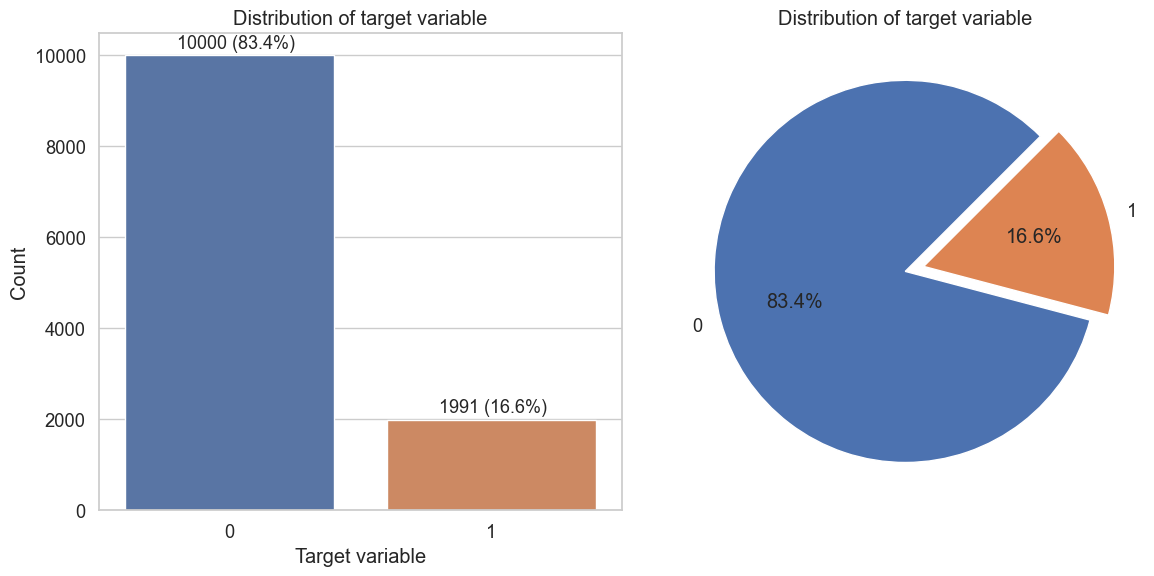

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='left', data=df)
plt.title('Distribution of target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
for p in ax.patches:
    percentage = f'{p.get_height()} ({100 * p.get_height() / len(df):.1f}%)\n'
    ax.annotate(percentage, (p.get_x()+0.2, p.get_height()-300), fontsize=13)
plt.subplot(1,2,2)
plt.pie(df.left.value_counts(), labels = df.left.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1))
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show()

### Satisfaction Level

In [21]:
df.groupby('left')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,10000.000,0.667,0.217,0.120,0.540,0.690,0.840,1.000
1,1991.000,0.440,0.265,0.090,0.110,0.410,0.730,0.920


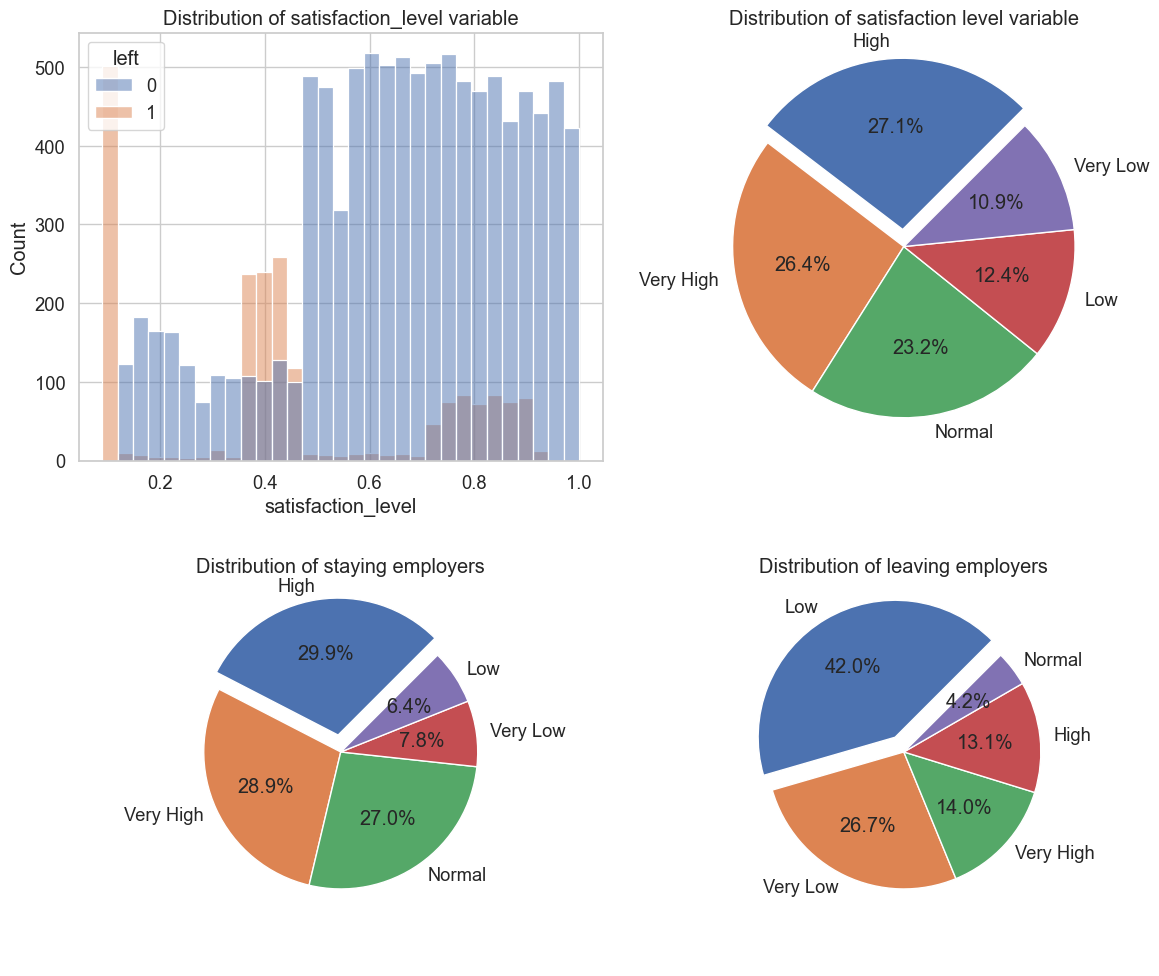

In [22]:
df["satisfaction_level2"] = pd.cut(df["satisfaction_level"],5,labels=["Very Low","Low","Normal","High","Very High"])

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ax = sns.histplot(x='satisfaction_level', hue="left", data=df, stat="count")
plt.title('Distribution of satisfaction_level variable')
plt.subplot(2,2,2)
plt.pie(df.satisfaction_level2.value_counts(), labels = df.satisfaction_level2.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0.1,0,0,0,0))
plt.title('Distribution of satisfaction level variable')
plt.subplot(2,2,3)
plt.pie(df[df["left"]==0].satisfaction_level2.value_counts(), labels = df[df["left"]==0].satisfaction_level2.value_counts().index, radius=0.8, autopct = '%1.1f%%', startangle = 45, explode = (0.1,0,0,0,0))
plt.title('Distribution of staying employers', pad=-25)
plt.subplot(2,2,4)
plt.pie(df[df["left"]==1].satisfaction_level2.value_counts(), labels = df[df["left"]==1].satisfaction_level2.value_counts().index, radius=0.8, autopct = '%1.1f%%', startangle = 45, explode = (0.1,0,0,0,0))
plt.title('Distribution of leaving employers', pad=-25)
plt.tight_layout()

### Last Evaluation

In [23]:
df.groupby('left')['last_evaluation'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,10000.000,0.716,0.162,0.360,0.580,0.710,0.850,1.000
1,1991.000,0.722,0.197,0.450,0.520,0.790,0.910,1.000


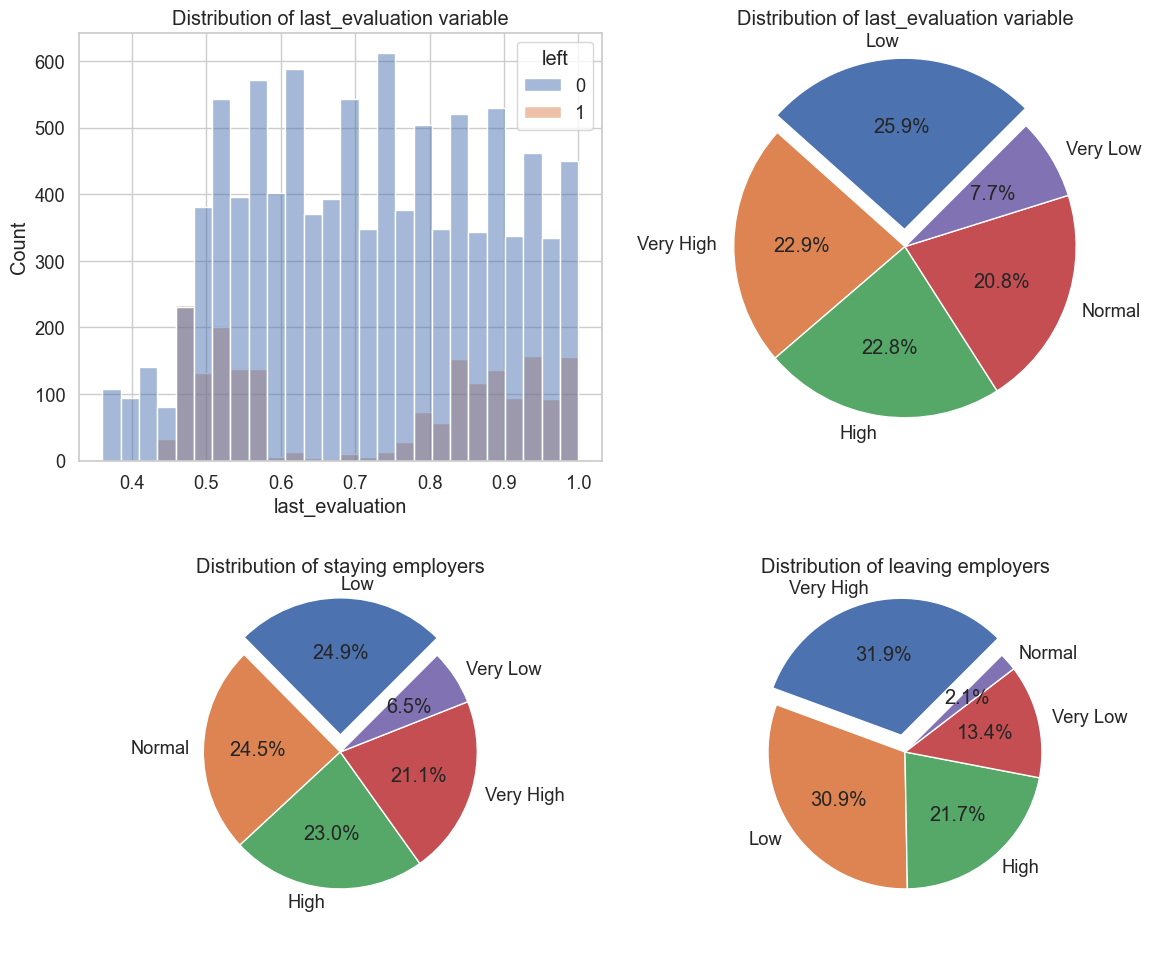

In [24]:
df["last_evaluation2"] = pd.cut(df["last_evaluation"],5,labels=["Very Low","Low","Normal","High","Very High"])

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ax = sns.histplot(x='last_evaluation', hue="left", data=df, stat="count")
plt.title('Distribution of last_evaluation variable')
plt.subplot(2,2,2)
plt.pie(df.last_evaluation2.value_counts(), labels = df.last_evaluation2.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0.1,0,0,0,0))
plt.title('Distribution of last_evaluation variable')
plt.subplot(2,2,3)
plt.pie(df[df["left"]==0].last_evaluation2.value_counts(), labels = df[df["left"]==0].last_evaluation2.value_counts().index, radius=0.8, autopct = '%1.1f%%', startangle = 45, explode = (0.1,0,0,0,0))
plt.title('Distribution of staying employers', pad=-25)
plt.subplot(2,2,4)
plt.pie(df[df["left"]==1].last_evaluation2.value_counts(), labels = df[df["left"]==1].last_evaluation2.value_counts().index, radius=0.8, autopct = '%1.1f%%', startangle = 45, explode = (0.1,0,0,0,0))
plt.title('Distribution of leaving employers', pad=-25)
plt.tight_layout()

### Number of Projects

In [25]:
df.number_project.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [26]:
df.groupby('left')['number_project'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,10000.000,3.787,0.982,2.000,3.000,4.000,4.000,6.000
1,1991.000,3.883,1.817,2.000,2.000,4.000,6.000,7.000


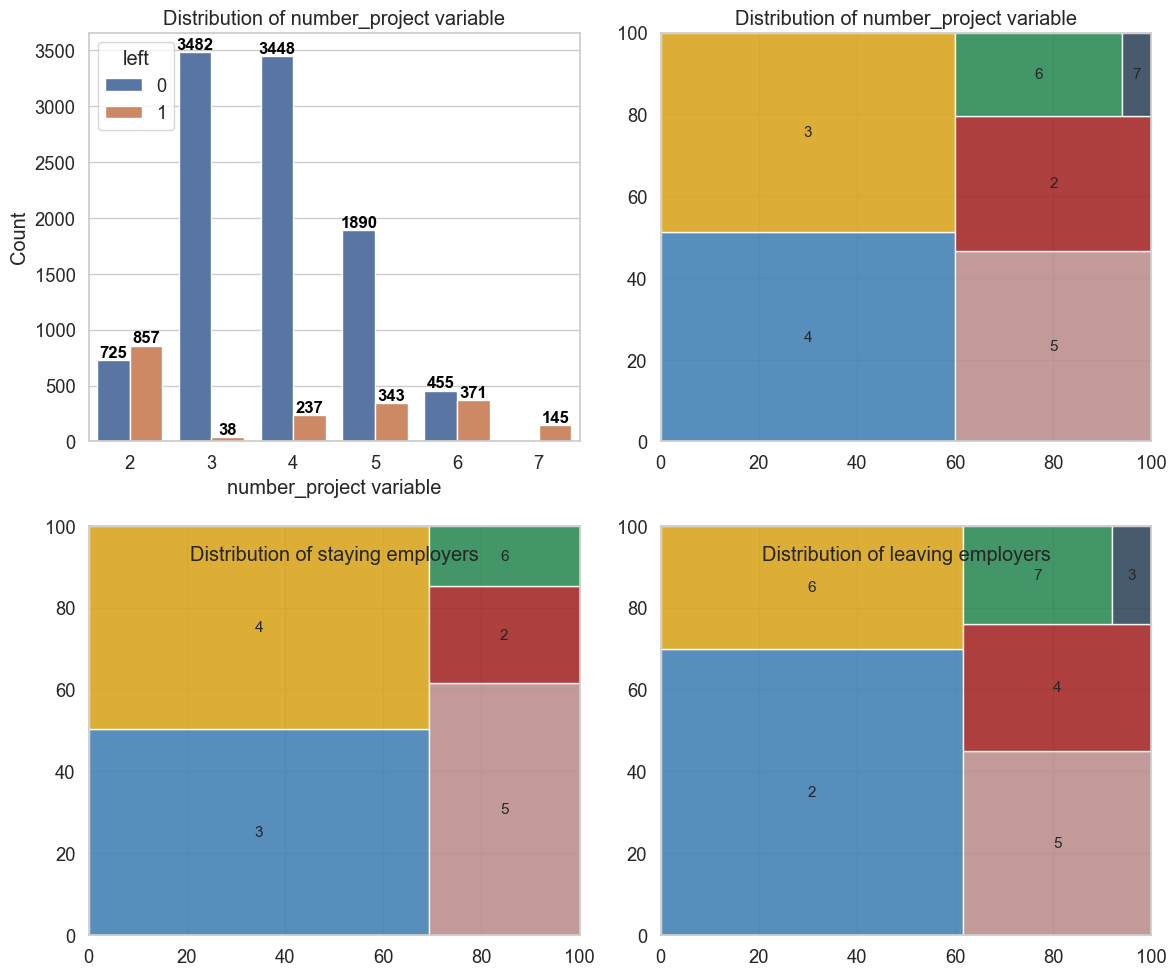

In [27]:
plt.figure(figsize=(12,10))
color=['steelblue', 'goldenrod', 'rosybrown','brown', 'seagreen','#34495E']
plt.subplot(2,2,1)
ax = sns.countplot(x='number_project', hue="left", data=df)
plt.title('Distribution of number_project variable')
plt.xlabel('number_project variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.subplot(2,2,2)
squarify.plot(sizes =df.number_project.value_counts().values, label = df.number_project.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of number_project variable')
plt.subplot(2,2,3)
squarify.plot(sizes =df[df["left"]==0].number_project.value_counts().values, label = df[df["left"]==0].number_project.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of staying employers', pad=-25)
plt.subplot(2,2,4)
squarify.plot(sizes =df[df["left"]==1].number_project.value_counts().values, label = df[df["left"]==1].number_project.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of leaving employers', pad=-25)
plt.tight_layout()

### Average Monthly Hours

In [28]:
df.groupby('left')['average_montly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,10000.000,198.943,45.666,96.000,162.000,198.000,238.000,287.000
1,1991.000,208.162,61.295,126.000,146.000,226.000,262.500,310.000


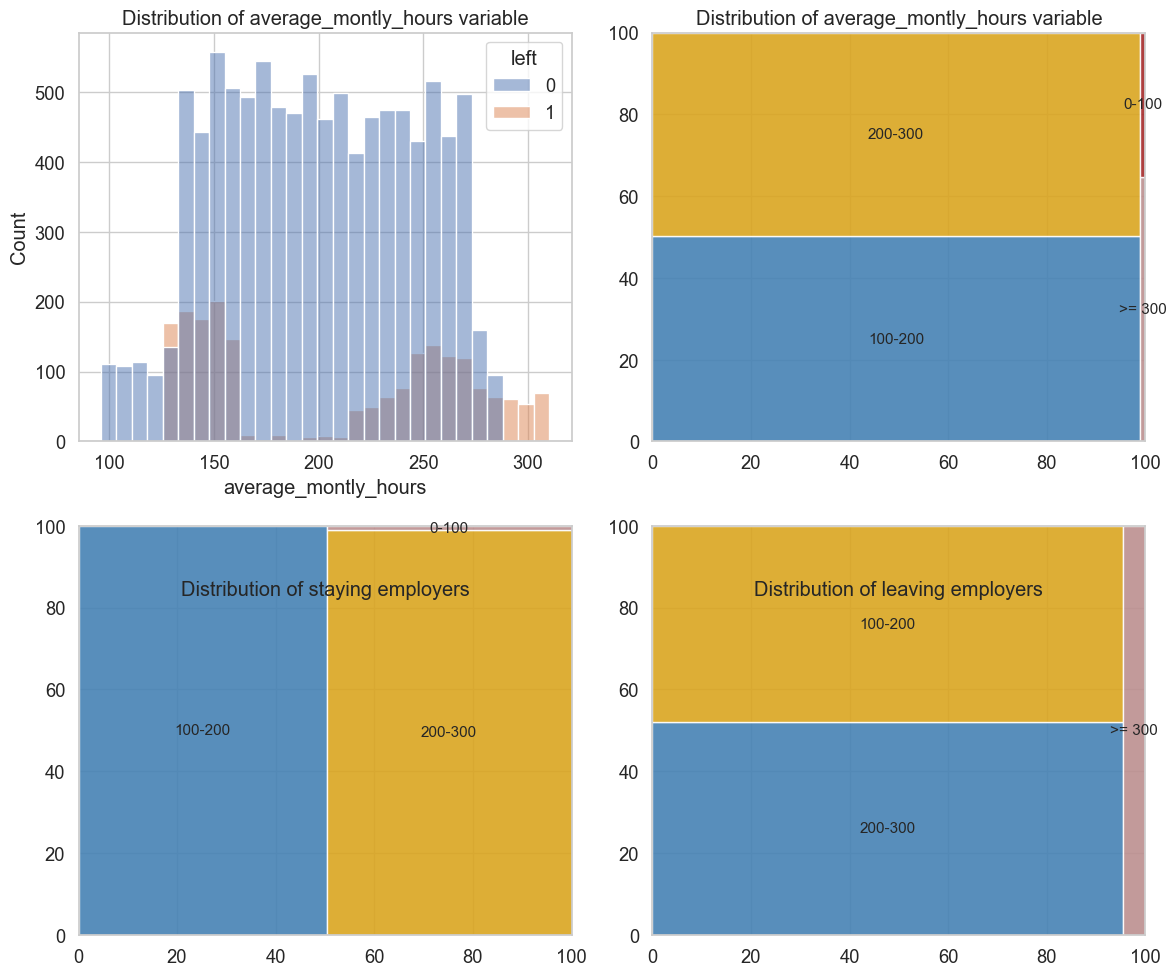

In [29]:
def monthly_hour(x):    
    if x < 100:
        return "0-100"
    elif x < 200:
        return "100-200"
    elif x <= 300:
        return "200-300"
    elif x >= 300:
        return ">= 300"
    
df["average_montly_hours2"] = df["average_montly_hours"].apply(monthly_hour)

plt.figure(figsize=(12,10))
color=['steelblue', 'goldenrod', 'rosybrown','brown', 'seagreen','#34495E']
plt.subplot(2,2,1)
ax = sns.histplot(x='average_montly_hours', hue="left", data=df, stat="count")
plt.title('Distribution of average_montly_hours variable')
plt.subplot(2,2,2)
squarify.plot(sizes = df.average_montly_hours2.value_counts().values, label = df.average_montly_hours2.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of average_montly_hours variable')
plt.subplot(2,2,3)
squarify.plot(sizes = df[df["left"]==0].average_montly_hours2.value_counts().values, label = df[df["left"]==0].average_montly_hours2.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of staying employers', pad=-50)
plt.subplot(2,2,4)
squarify.plot(sizes= df[df["left"]==1].average_montly_hours2.value_counts().values, label = df[df["left"]==1].average_montly_hours2.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of leaving employers', pad=-50)
plt.tight_layout()

### Time Spent in Company

In [30]:
df.groupby("left")["time_spend_company"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,10000.000,3.262,1.367,2.000,2.000,3.000,4.000,10.000
1,1991.000,3.881,0.974,2.000,3.000,4.000,5.000,6.000


In [31]:
df.time_spend_company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

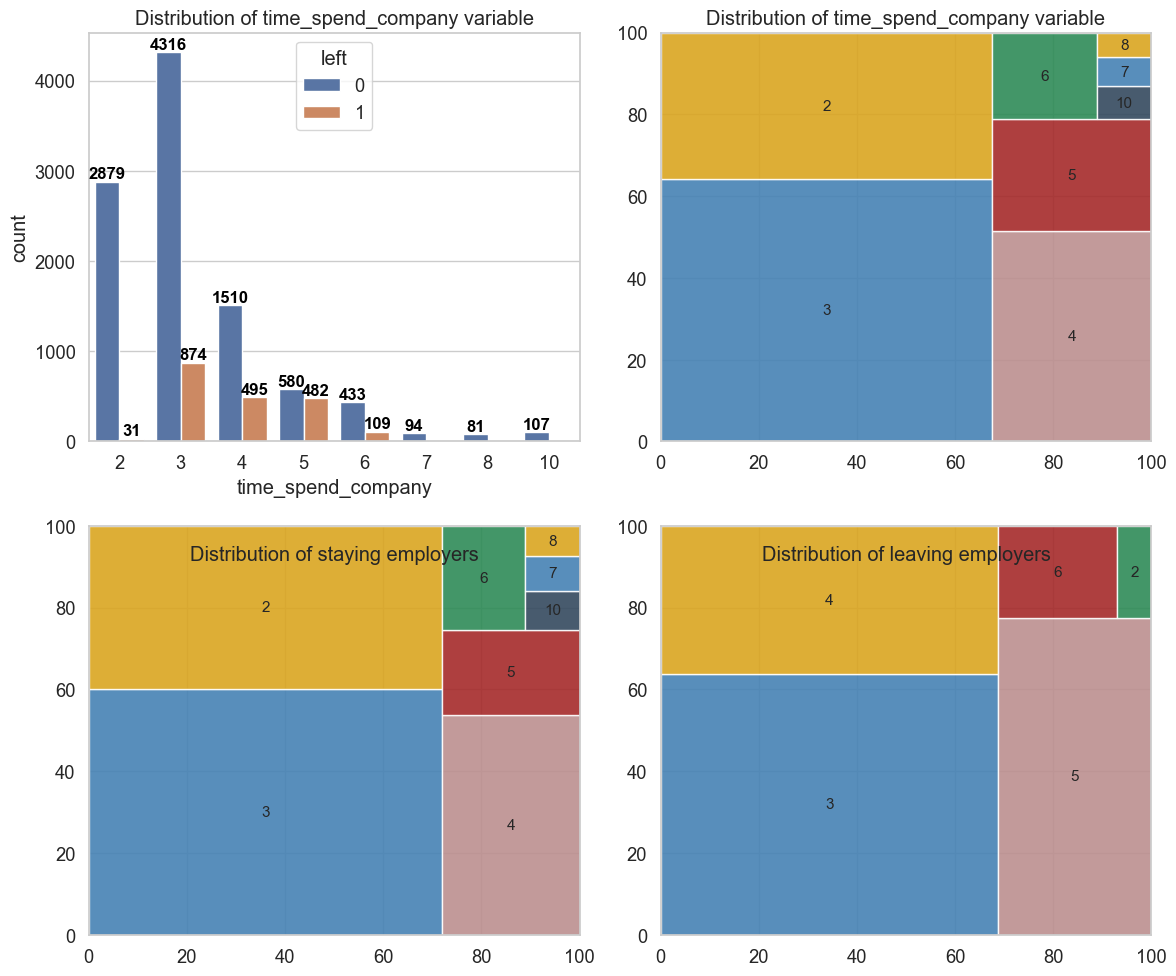

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ax = sns.countplot(x='time_spend_company', hue="left", data=df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.title('Distribution of time_spend_company variable')
plt.subplot(2,2,2)
squarify.plot(sizes = df.time_spend_company.value_counts().values, label = df.time_spend_company.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of time_spend_company variable')
plt.subplot(2,2,3)
squarify.plot(sizes = df[df["left"]==0].time_spend_company.value_counts().values, label = df[df["left"]==0].time_spend_company.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of staying employers', pad=-25)
plt.subplot(2,2,4)
squarify.plot(sizes= df[df["left"]==1].time_spend_company.value_counts().values, label = df[df["left"]==1].time_spend_company.value_counts().index, alpha=.9, text_kwargs={'fontsize':11}, color=color)
plt.title('Distribution of leaving employers', pad=-25)
plt.tight_layout()

### Work Accident

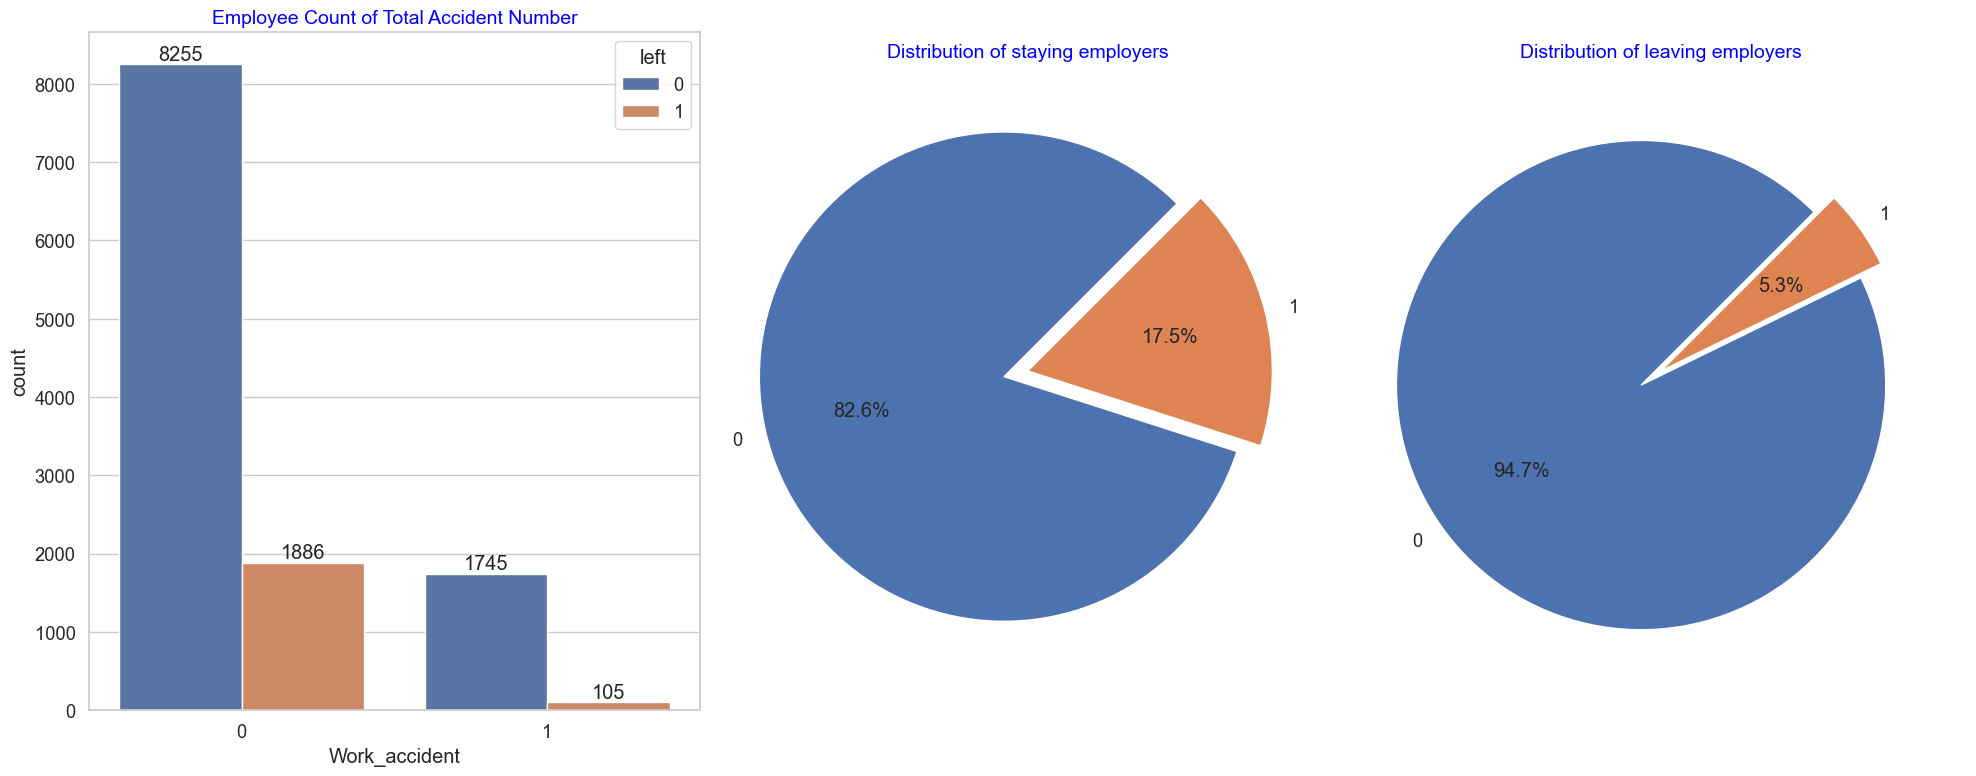

In [33]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Employee Count of Total Accident Number", c="blue", size=14)
ax = sns.countplot(x="Work_accident", hue="left", data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.pie(df[df.left == 0].Work_accident.value_counts(), labels = df[df.left == 0].Work_accident.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.title("Distribution of staying employers", c="blue", size=14)
plt.subplot(1,3,3)
plt.pie(df[df.left == 1].Work_accident.value_counts(), labels = df[df.left == 1].Work_accident.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.title("Distribution of leaving employers", c="blue", size=14)
plt.tight_layout()
plt.show()

### Promotion Last 5 years

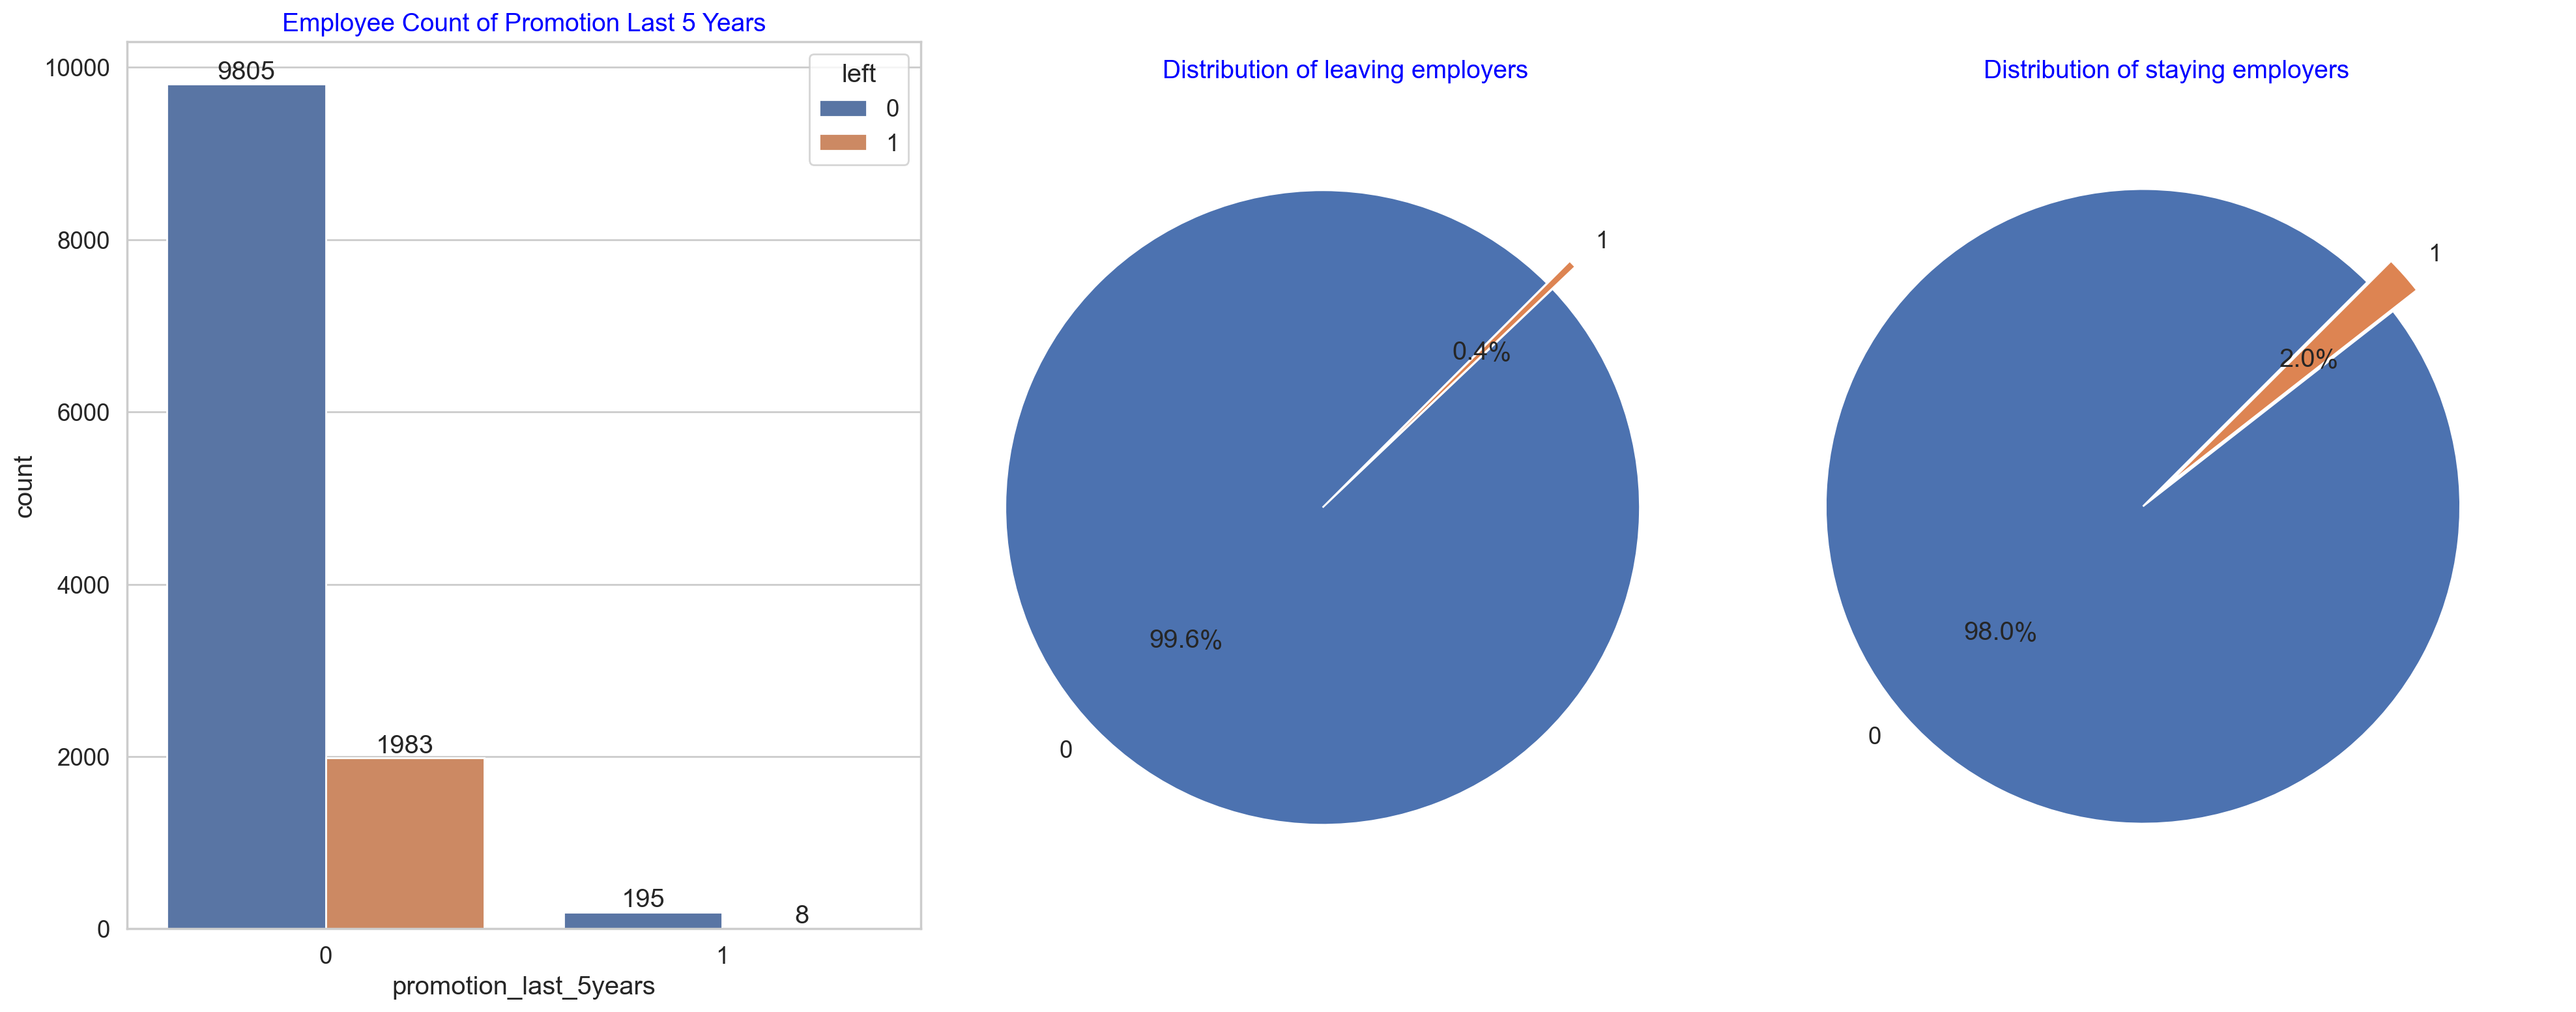

In [34]:
plt.figure(figsize=(20, 8), dpi=200)
plt.subplot(1,3,1)
plt.title("Employee Count of Promotion Last 5 Years", c="blue", size=14)
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Distribution of leaving employers", c="blue", size=14)
plt.pie(df[df.left == 1].promotion_last_5years.value_counts(), labels = df[df.left == 1].promotion_last_5years.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.subplot(1,3,3)
plt.title("Distribution of staying employers", c="blue", size=14)
plt.pie(df[df.left == 0].promotion_last_5years.value_counts(), labels = df[df.left == 0].promotion_last_5years.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.tight_layout()
plt.show()

### Departments

Text(0.5, 1.0, 'Distribution of departments variable')

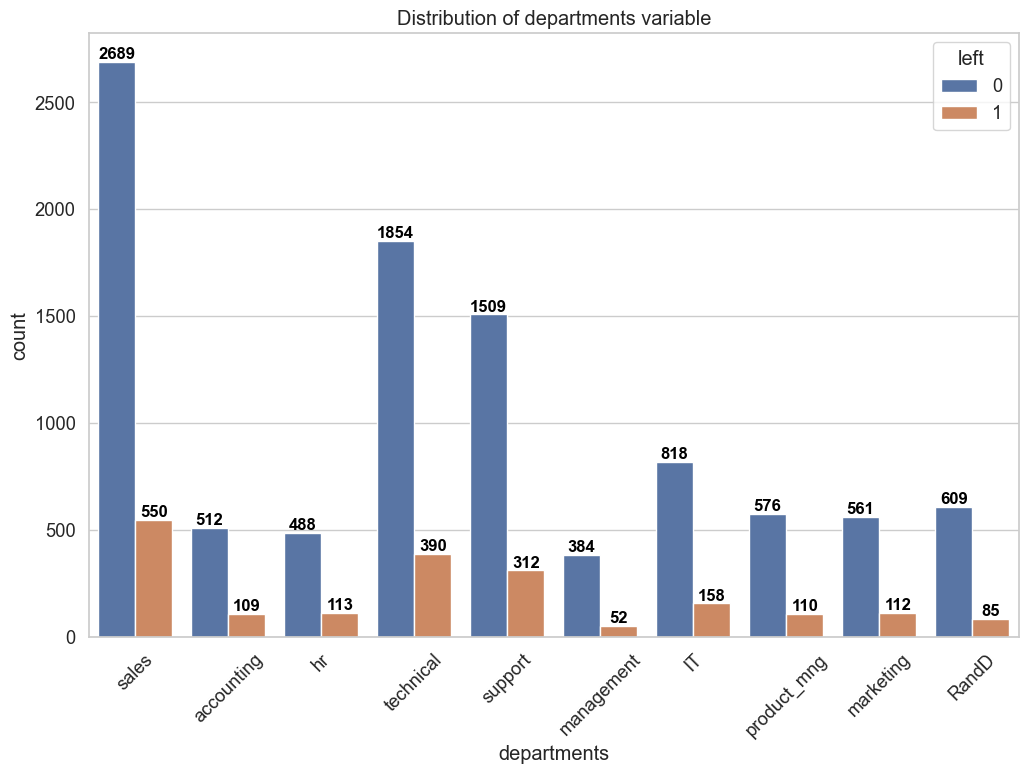

In [35]:
ax = sns.countplot(x='departments', hue="left", data=df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.xticks(rotation=45)
plt.title('Distribution of departments variable')

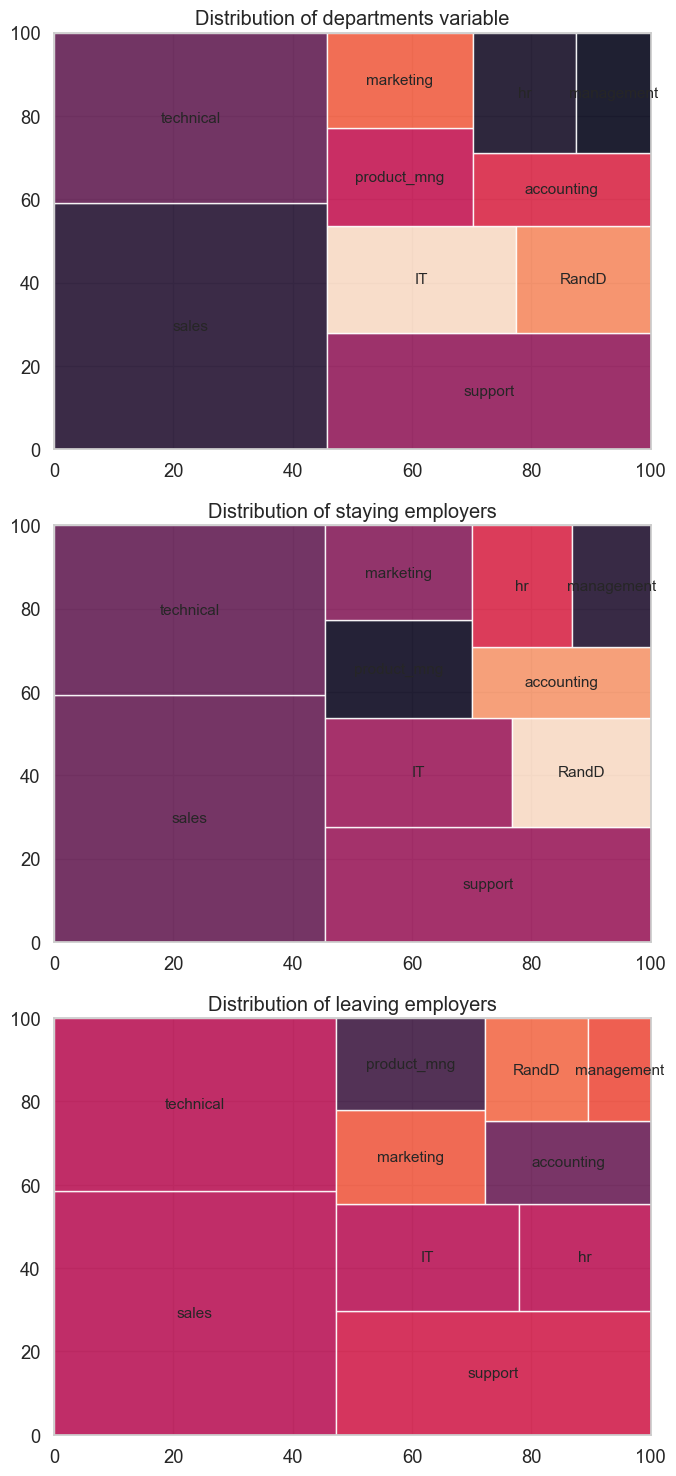

In [36]:
plt.figure(figsize=(7,15))
plt.subplot(3,1,1)
squarify.plot(sizes = df.departments.value_counts().values, label = df.departments.value_counts().index, alpha=.9, text_kwargs={'fontsize':11})
plt.title('Distribution of departments variable')
plt.subplot(3,1,2)
squarify.plot(sizes = df[df["left"]==0].departments.value_counts().values, label = df[df["left"]==0].departments.value_counts().index, alpha=.9, text_kwargs={'fontsize':11})
plt.title('Distribution of staying employers')
plt.subplot(3,1,3)
squarify.plot(sizes= df[df["left"]==1].departments.value_counts().values, label = df[df["left"]==1].departments.value_counts().index, alpha=.9, text_kwargs={'fontsize':11})
plt.title('Distribution of leaving employers')
plt.tight_layout()

### Salary

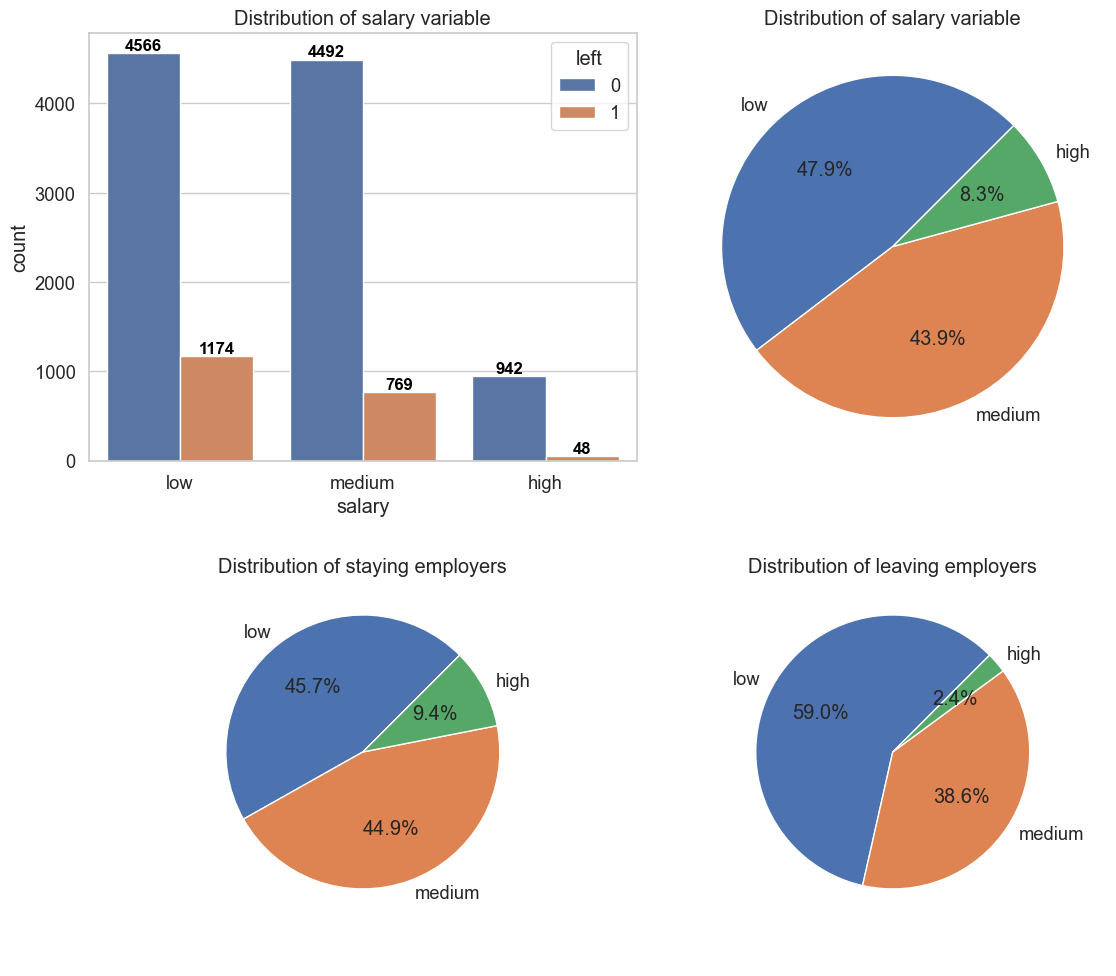

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ax = sns.countplot(x='salary', hue="left", data=df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.title('Distribution of salary variable')
plt.subplot(2,2,2)
plt.pie(df.salary.value_counts(), labels = df.salary.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0,0,0))
plt.title('Distribution of salary variable')
plt.subplot(2,2,3)
plt.pie(df[df["left"]==0].salary.value_counts(), labels = df[df["left"]==0].salary.value_counts().index, radius=0.8, autopct = '%1.1f%%', startangle = 45, explode = (0,0,0))
plt.title('Distribution of staying employers', pad=-25)
plt.subplot(2,2,4)
plt.pie(df[df["left"]==1].salary.value_counts(), labels = df[df["left"]==1].salary.value_counts().index, radius=0.8, autopct = '%1.1f%%', startangle = 45, explode = (0,0,0))
plt.title('Distribution of leaving employers', pad=-25)
plt.tight_layout()

### Subplots of Features

<AxesSubplot:>

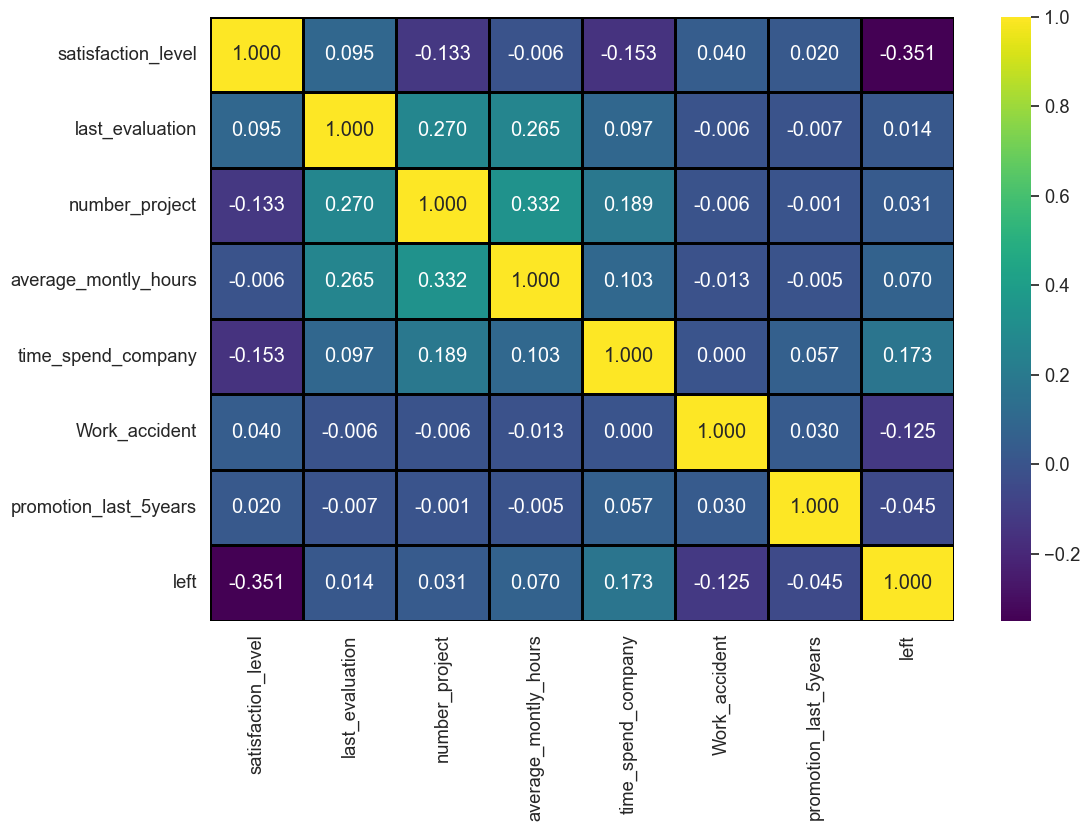

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidth=1, linecolor='black', fmt='.3f')

<AxesSubplot:>

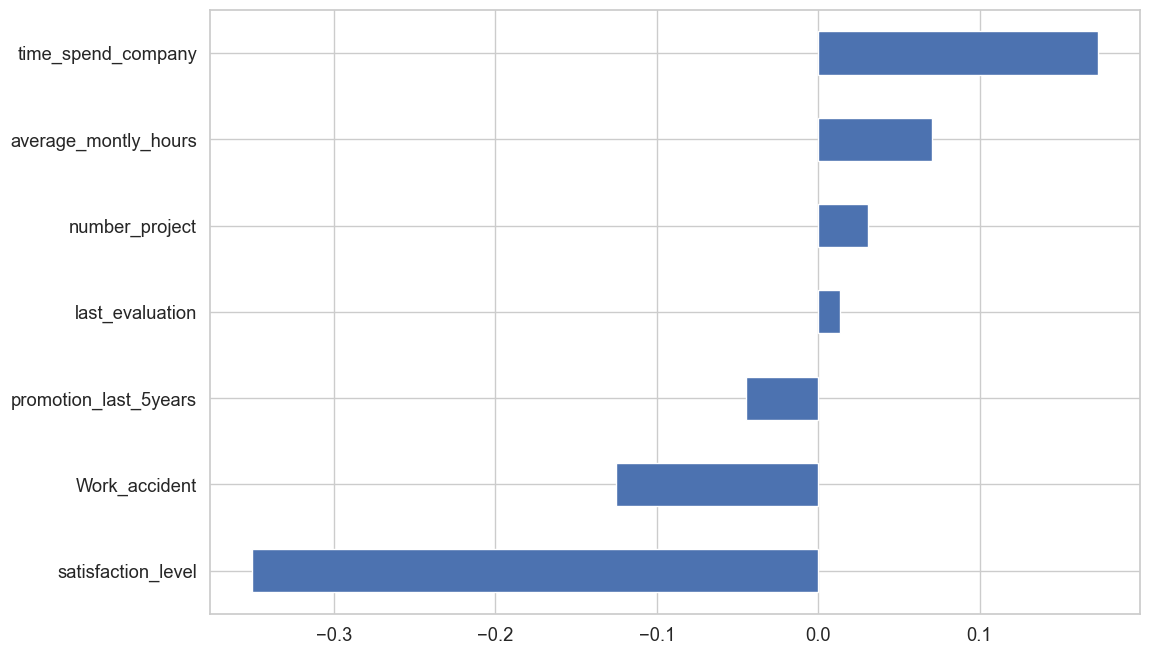

In [39]:
df.corr()['left'].drop('left').sort_values().plot.barh()

## 3. Data Pre-Processing

### Encoding

In [40]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary,left,satisfaction_level2,last_evaluation2,average_montly_hours2
0,0.380,0.530,2,157,3,0,0,sales,low,1,Low,Low,100-200
1,0.800,0.860,5,262,6,0,0,sales,medium,1,High,High,200-300
2,0.110,0.880,7,272,4,0,0,sales,medium,1,Very Low,Very High,200-300
3,0.720,0.870,5,223,5,0,0,sales,low,1,High,High,200-300
4,0.370,0.520,2,159,3,0,0,sales,low,1,Low,Low,100-200


In [41]:
drop_columns(df, ["satisfaction_level2","last_evaluation2","average_montly_hours2"])

['satisfaction_level2', 'last_evaluation2', 'average_montly_hours2'] were dropped


In [42]:
df2 = df.copy()

In [43]:
from sklearn.preprocessing import OrdinalEncoder
enc1 = OrdinalEncoder()
df2["salary"]  = enc1.fit_transform(df2[['salary']])

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
cat = list(df2.select_dtypes("object").columns)
onehot_encoder = pd.DataFrame(encoder.fit_transform(df2[cat]), index = df2.index, columns = encoder.get_feature_names(cat))
drop_columns(df2, "departments")
df2 = df2.join(onehot_encoder)
df2.head()

departments were dropped


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,departments_IT,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical
0,0.380,0.530,2,157,3,0,0,1.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,0.800,0.860,5,262,6,0,0,2.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,0.110,0.880,7,272,4,0,0,2.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0.720,0.870,5,223,5,0,0,1.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,0.370,0.520,2,159,3,0,0,1.000,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


### Scaling   

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled.shape

(11991, 19)

## 4. Cluster Analysis of with K-Means

- 

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [46]:
X = pd.DataFrame(df2_scaled, columns=df2.columns)[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","salary"]]
# drop_columns(X, "left")
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary
0,0.319,0.266,0.000,0.285,0.125,0.000,0.500
1,0.780,0.781,0.600,0.776,0.500,0.000,1.000
2,0.022,0.812,1.000,0.822,0.250,0.000,1.000
3,0.692,0.797,0.600,0.593,0.375,0.000,0.500
4,0.308,0.250,0.000,0.294,0.125,0.000,0.500


In [47]:
X.shape

(11991, 7)

In [48]:
from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.17246812421956367

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

Text(0.5, 1.0, 'elbow method')

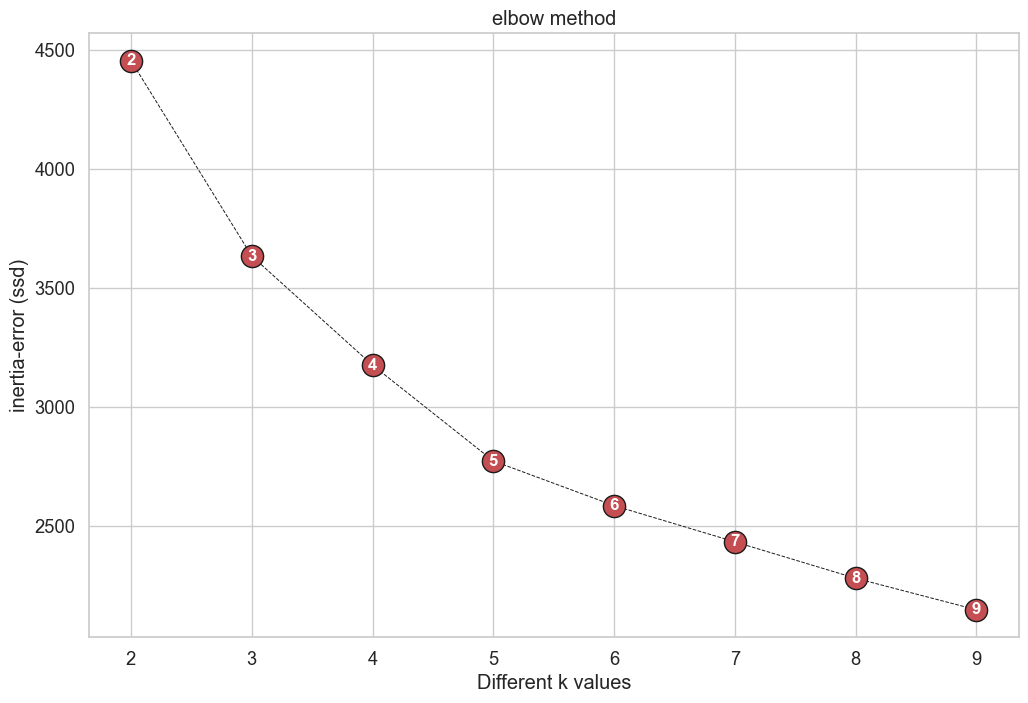

In [49]:
from sklearn.cluster import KMeans
ssd = [] #sum squared distance
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
plt.plot(
    K, ssd, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")

<AxesSubplot:>

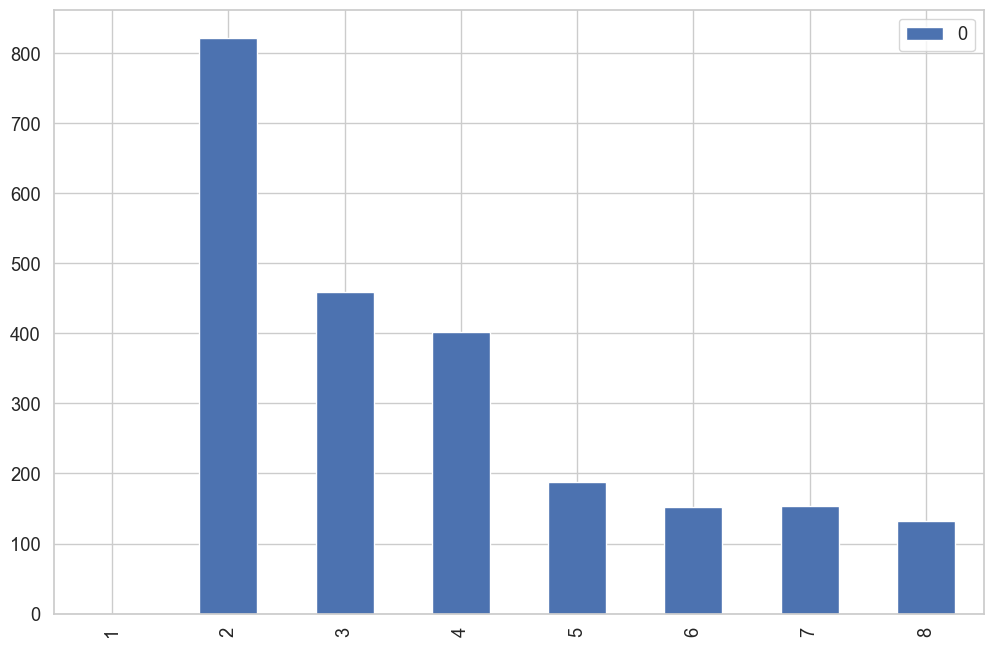

In [50]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar')

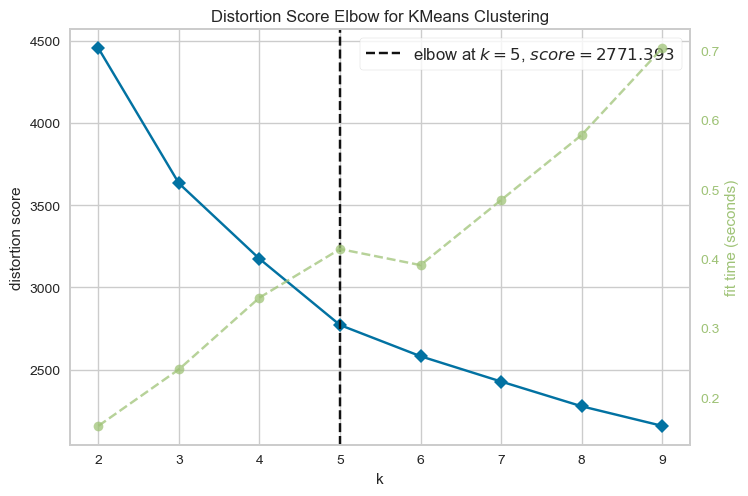

In [51]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X)      
visualizer.show();

In [52]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.37433414296676026
For n_clusters=3, the silhouette score is 0.24116817722937134
For n_clusters=4, the silhouette score is 0.2559216074669296
For n_clusters=5, the silhouette score is 0.25877847354258116
For n_clusters=6, the silhouette score is 0.24194362304723385
For n_clusters=7, the silhouette score is 0.22839774849611258
For n_clusters=8, the silhouette score is 0.2156073291755998
For n_clusters=9, the silhouette score is 0.2227180460973341


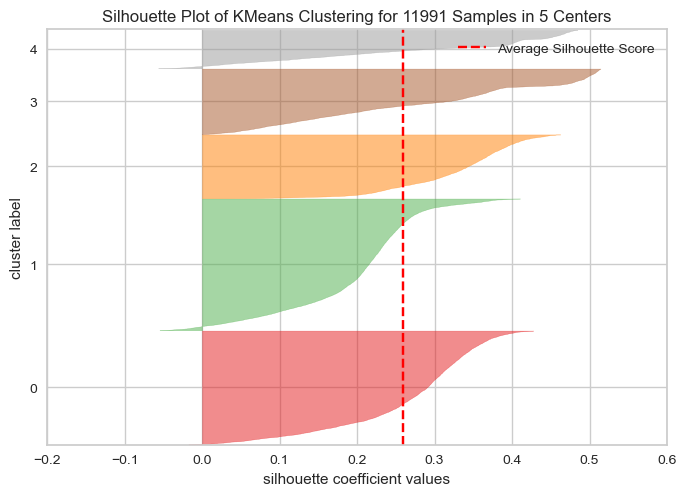

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=101)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [54]:
model_kmeans = KMeans(n_clusters = 5, random_state=101)
model_kmeans.fit_predict(X)

array([3, 0, 4, ..., 1, 1, 1])

In [55]:
X["prediction"] = model_kmeans.labels_
X["left"] = df2["left"]
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,salary,prediction,left
0,0.319,0.266,0.000,0.285,0.125,0.000,0.500,3,1
1,0.780,0.781,0.600,0.776,0.500,0.000,1.000,0,1
2,0.022,0.812,1.000,0.822,0.250,0.000,1.000,4,1
3,0.692,0.797,0.600,0.593,0.375,0.000,0.500,1,1
4,0.308,0.250,0.000,0.294,0.125,0.000,0.500,3,1


In [56]:
pd.crosstab(X["prediction"], X["left"])

left,0,1
prediction,,
0,3087,216
1,3481,342
2,1745,105
3,1094,807
4,593,521


<AxesSubplot:title={'center':'Compare (predicted-clusters vs left)'}, xlabel='prediction'>

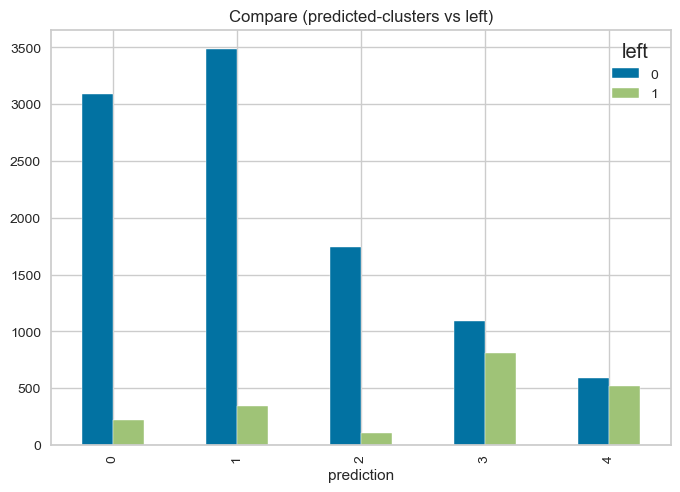

In [57]:
pd.crosstab(X["prediction"], X["left"]).plot(kind="bar", title='Compare (predicted-clusters vs left)')

### Conclusion

When we removed the "left, departments and promotion" column from the data (We see in EDA that there is no affect on left columns) and put it into the K-means algorithm, we concluded that it is more appropriate to create 5 clusters. When we compared the prediction results made in this way with the "left"/target column, we did not find a significant result with K-Means algorithm.

## 5. Model Building

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary,left
0,0.380,0.530,2,157,3,0,0,sales,low,1
1,0.800,0.860,5,262,6,0,0,sales,medium,1
2,0.110,0.880,7,272,4,0,0,sales,medium,1
3,0.720,0.870,5,223,5,0,0,sales,low,1
4,0.370,0.520,2,159,3,0,0,sales,low,1


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

In [60]:
def classification_validation(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n"*3, "-*"*30)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Split Data as Train and Test Set

In [61]:
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (9592, 9) (9592,)
Test set: (2399, 9) (2399,)


### Distance Based Algorithm (KNN)

#### Model Building

In [62]:
preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']),
    ('encoder_nominal', OneHotEncoder(), ['departments'])], remainder='passthrough')

knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())])

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

classification_validation(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[1931   70]
 [  43  355]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.89      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7803  196]
 [ 189 1404]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [63]:
model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier())])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=5,return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.947
train_accuracy    0.958
test_precision    0.829
train_precision   0.870
test_recall       0.862
train_recall      0.879
test_f1           0.845
train_f1          0.874
test_roc_auc      0.943
train_roc_auc     0.990
dtype: float64

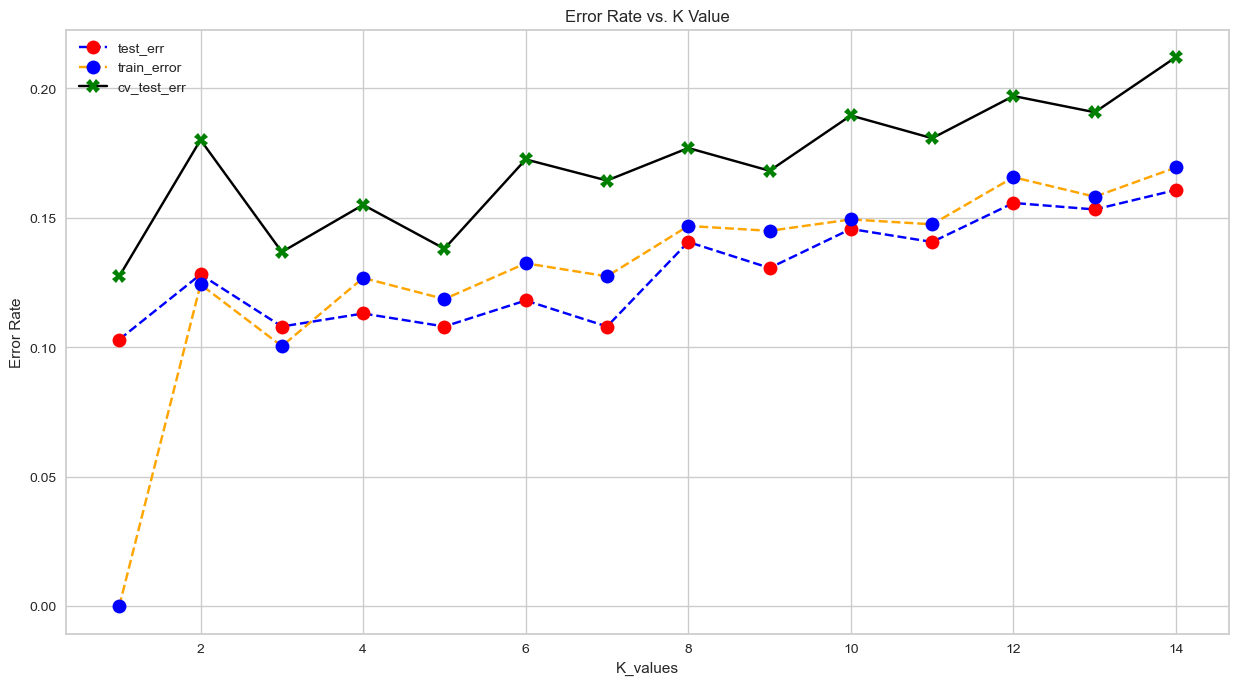

In [64]:
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
test_error_rates_cv = []

for k in range(1,15):
    model = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()),
                            ('knn', KNeighborsClassifier(n_neighbors=k))])
    scores = cross_validate(model, X_train, y_train, scoring = ['recall'], cv = 5, error_score="raise")
    recall_mean = scores["test_recall"].mean() 
    
    test_errorcv = 1 - recall_mean 
    test_error_rates_cv.append(test_errorcv)

test_error_rates = []
train_error_rates = []
for k in range(1,15):
    pipe_knn = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()),
                            ('knn', KNeighborsClassifier(n_neighbors=k))])
    pipe_knn.fit(X_train,y_train) 
    y_pred_test = pipe_knn.predict(X_test)
    y_pred_train = pipe_knn.predict(X_train)
    test_error = 1 - recall_score(y_test,y_pred_test)
    train_error = 1 - recall_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)



plt.figure(figsize=(15,8))
plt.plot(range(1,15), test_error_rates, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1,15), train_error_rates, color='orange', linestyle='--', marker='o', markerfacecolor='blue', markersize=10)
plt.plot(range(1,15), test_error_rates_cv, color='black', linestyle='-', marker='X', markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(["test_err","train_error", "cv_test_err"])




In [65]:
model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=3))])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=5,return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.947
train_accuracy    0.966
test_precision    0.828
train_precision   0.901
test_recall       0.863
train_recall      0.896
test_f1           0.845
train_f1          0.899
test_roc_auc      0.939
train_roc_auc     0.995
dtype: float64

In [66]:
param_grid = { "knn__p" : [1,2],
              "knn__n_neighbors" : range(1,15),
              "knn__weights" : ['uniform', 'distance'],
             "knn__leaf_size": [15, 30, 40]}

pipe_knn = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()),
                            ('knn', KNeighborsClassifier())])
pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring= 'recall')
pipe_grid.fit(X_train,y_train)
print("Best parameters for KNN are : ",pipe_grid.best_params_)
print("Best score for KNN are : ",pipe_grid.best_score_)
classification_validation(pipe_grid, X_train, y_train, X_test, y_test)

Best parameters for KNN are :  {'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
Best score for KNN are :  0.8844995169653596
Test_Set
[[1932   69]
 [  37  361]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.91      0.87       398

    accuracy                           0.96      2399
   macro avg       0.91      0.94      0.92      2399
weighted avg       0.96      0.96      0.96      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [67]:
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=3))])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OneHotEncoder(),
                                                  ['departments'])])),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [68]:
classification_validation(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[1935   66]
 [  43  355]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.89      0.87       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.95      0.96      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7848  151]
 [ 160 1433]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.90      0.90      0.90      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.94      0.94      9592
weighted avg       0.97      0.97      0.97      9592



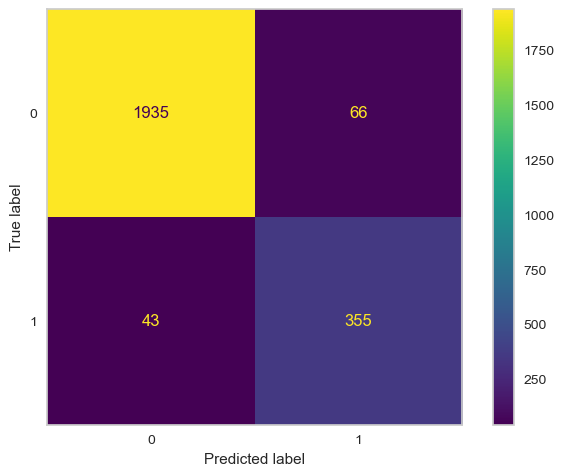

In [69]:
plot_confusion_matrix(knn_model, X_test, y_test)
plt.grid(False)
plt.show()

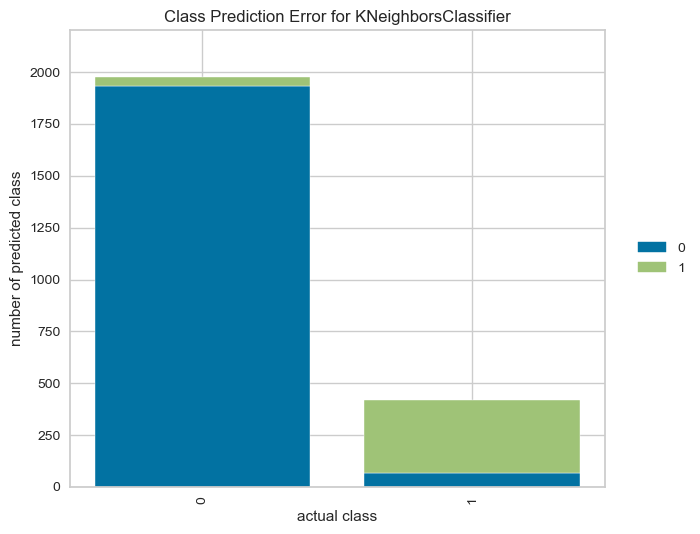

In [70]:
visualizer = ClassPredictionError(knn_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

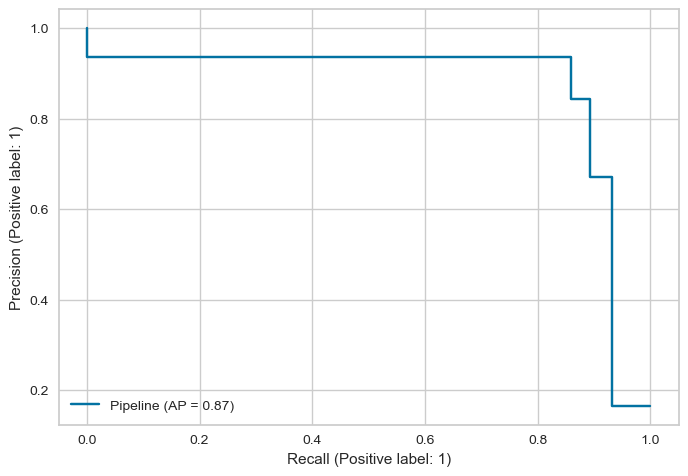

In [71]:
plot_precision_recall_curve(knn_model, X_test, y_test);

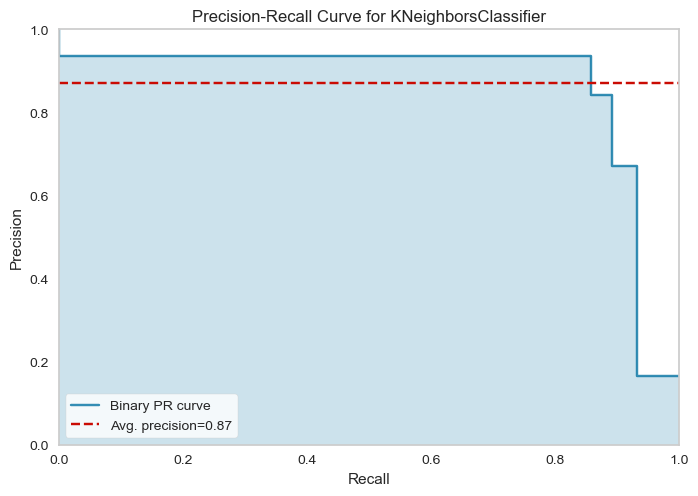

In [72]:
viz = PrecisionRecallCurve(knn_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Feature Importance

***Since KNN is a non-parametric algorithm, we cannot do feature importance in this model.***

#### Scores

In [73]:
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

### Random Forest Classifier

#### Model Building

In [74]:
preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']),
    ('encoder_nominal', OneHotEncoder(), ['departments'])], remainder='passthrough')

operations = [("OrdinalEncoder", preprocessor), ("RF_model", RandomForestClassifier())]
pipe_rf = Pipeline(steps=operations)
pipe_rf.fit(X_train, y_train)
classification_validation(pipe_rf, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [75]:
operations = [("OrdinalEncoder", preprocessor), ("RF_model", RandomForestClassifier())]
pipe_rf = Pipeline(steps=operations)
scores = cross_validate(pipe_rf, X_train, y_train, scoring =  ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.983
train_accuracy    1.000
test_precision    0.988
train_precision   1.000
test_recall       0.910
train_recall      1.000
test_f1           0.947
train_f1          1.000
test_roc_auc      0.978
train_roc_auc     1.000
dtype: float64

In [76]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[3, 5, "auto"],
             'RF_model__max_depth':[3,5,7],
             'RF_model__min_samples_split':[3,5,7],
             'RF_model__min_samples_leaf': [3,5,7],
             'RF_model__max_samples':[0.5, 0.8]}
operations = [("OrdinalEncoder", preprocessor), ("RF_model", RandomForestClassifier())]
model = Pipeline(steps=operations)
rf_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2)
rf_grid_model.fit(X_train, y_train)
print("Best parameters for Random Forest are : ",rf_grid_model.best_params_)
print("Best score for Random Forest are : ",rf_grid_model.best_score_)
classification_validation(rf_grid_model, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters for Random Forest are :  {'RF_model__max_depth': 7, 'RF_model__max_features': 5, 'RF_model__max_samples': 0.8, 'RF_model__min_samples_leaf': 3, 'RF_model__min_samples_split': 3, 'RF_model__n_estimators': 64}
Best score for Random Forest are :  0.9045819285897361
Test_Set
[[1995    6]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.98      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7969   30]
 [ 139 1454]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       0.98      0.91      0.95      1593

    accuracy                

#### Evaluating Model Performance and Tuning

In [77]:
operations = [("OrdinalEncoder", preprocessor), ("RF_model", RandomForestClassifier(n_estimators=128, min_samples_split=3,
                                            max_features=5, max_samples=0.8, min_samples_leaf=3, max_depth=7))]
rf_model = Pipeline(steps=operations)
rf_model.fit(X_train, y_train)
classification_validation(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1995    6]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.98      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7973   26]
 [ 141 1452]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       0.98      0.91      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.95      0.97      9592
weighted avg       0.98      0.98      0.98      9592



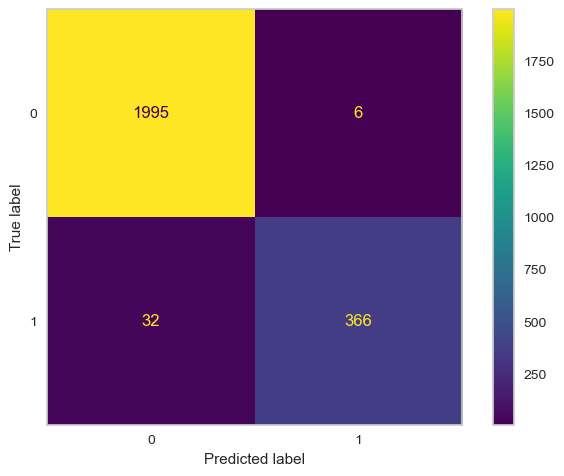

In [78]:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.grid(False)
plt.show()

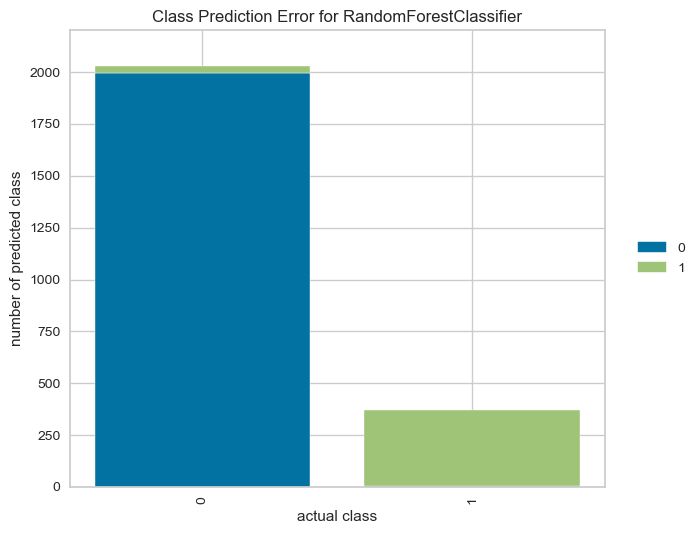

In [79]:
visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

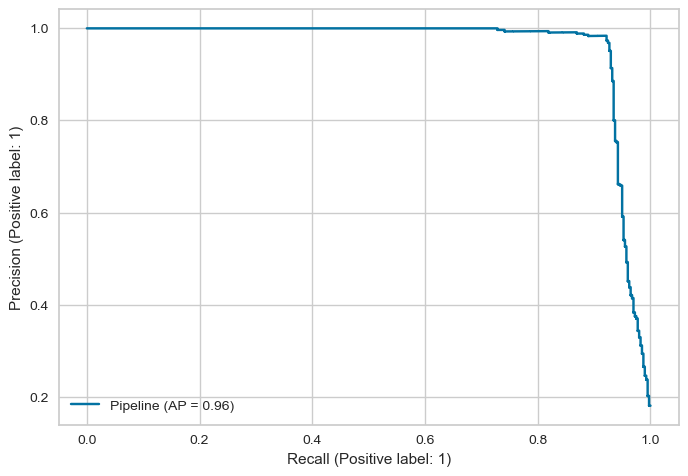

In [80]:
plot_precision_recall_curve(rf_model, X_test, y_test);

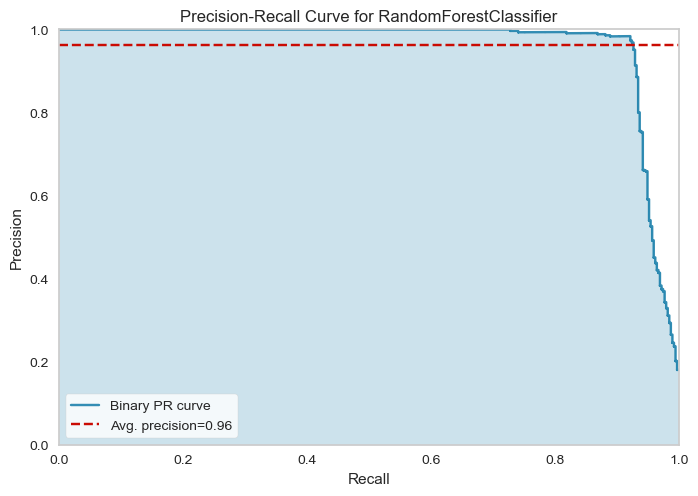

In [81]:
viz = PrecisionRecallCurve(rf_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Feature Importance

                         Feature Importance
satisfaction_level                    0.351
number_project                        0.216
time_spend_company                    0.162
average_montly_hours                  0.138
last_evaluation                       0.118
Work_accident                         0.006
salary                                0.005
departments_RandD                     0.001
departments_sales                     0.001
promotion_last_5years                 0.001
departments_management                0.000
departments_technical                 0.000
departments_support                   0.000
departments_IT                        0.000
departments_accounting                0.000
departments_marketing                 0.000
departments_hr                        0.000
departments_product_mng               0.000


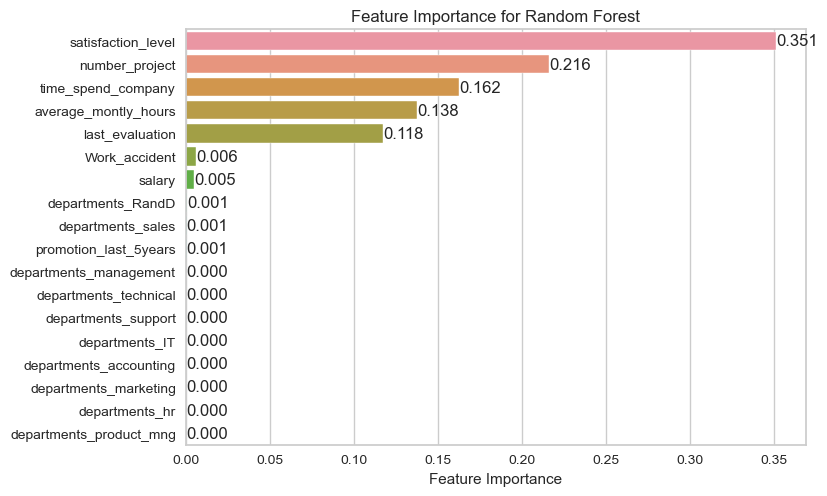

In [82]:
# print(rf_model["RF_model"].feature_importances_)
features = ["salary"]+ list(df2.iloc[:,9:].columns) + list(X_train.select_dtypes("number").columns)
rf_feature_imp = pd.DataFrame(data = rf_model["RF_model"].feature_importances_, index = features, #index=X.columns
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
print(rf_feature_imp)

ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

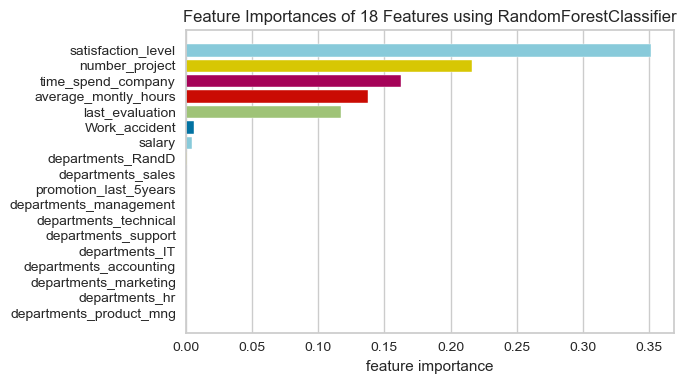

<AxesSubplot:title={'center':'Feature Importances of 18 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [83]:
viz = FeatureImportances(rf_model.named_steps['RF_model'], relative=False, labels=features)
visualizer = RadViz(size=(700, 400))
viz.fit(X_train, y_train)
viz.show()

#### Scores

In [84]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

### XGBoost Classifier

#### Model Building

In [85]:
preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']),
    ('encoder_nominal', OneHotEncoder(), ['departments'])], remainder='passthrough')

operations = [("OrdinalEncoder", preprocessor), ("XGB", XGBClassifier(random_state=42))]
pipe_xgb = Pipeline(steps=operations)
pipe_xgb.fit(X_train, y_train)
classification_validation(pipe_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[1984   17]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7952   47]
 [ 122 1471]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.97      0.92      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



In [86]:
operations = [("OrdinalEncoder", preprocessor), ("XGB", XGBClassifier(random_state=42))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1', 'roc_auc'],
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.980
train_accuracy    0.983
test_precision    0.962
train_precision   0.971
test_recall       0.915
train_recall      0.922
test_f1           0.938
train_f1          0.946
test_roc_auc      0.985
train_roc_auc     0.989
dtype: float64

In [87]:
param_grid = {"XGB__n_estimators":[100, 200, 300],
              'XGB__max_depth':[3,5,7], 
              "XGB__learning_rate": [0.05,0.1],
             "XGB__subsample":[0.7, 1], 
              "XGB__colsample_bytree":[0.7, 1]}

operations = [("OrdinalEncoder", preprocessor), ("XGB", XGBClassifier(random_state=42))]
xgb_model = Pipeline(steps=operations)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1).fit(X_train, y_train)

print("Best parameters for XG boosting are : ",xgb_grid.best_params_)
print("Best score for XG boosting are : ",xgb_grid.best_score_)

classification_validation(xgb_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for XG boosting are :  {'XGB__colsample_bytree': 1, 'XGB__learning_rate': 0.1, 'XGB__max_depth': 3, 'XGB__n_estimators': 200, 'XGB__subsample': 1}
Best score for XG boosting are :  0.9252932710317225
Test_Set
[[1983   18]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7956   43]
 [ 113 1480]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.97      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      

#### Evaluating Model Performance and Tuning

In [88]:
operations = [("OrdinalEncoder", preprocessor), ("XGB", XGBClassifier(random_state=42, n_estimators=200))]
xgb_model = Pipeline(steps=operations)
xgb_model.fit(X_train, y_train)
classification_validation(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[1983   18]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[7956   43]
 [ 113 1480]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.97      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



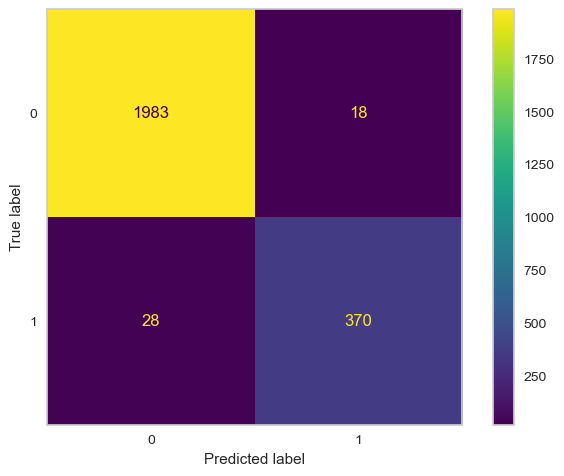

In [89]:
plot_confusion_matrix(xgb_model, X_test, y_test)
plt.grid(False)
plt.show()

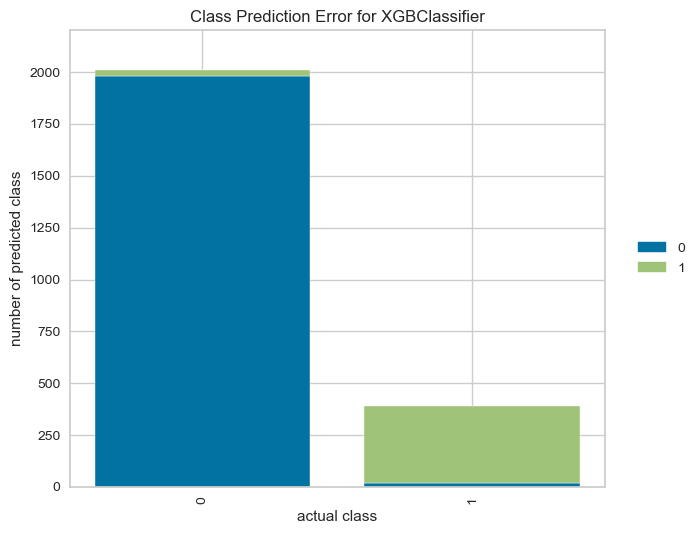

In [90]:
visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

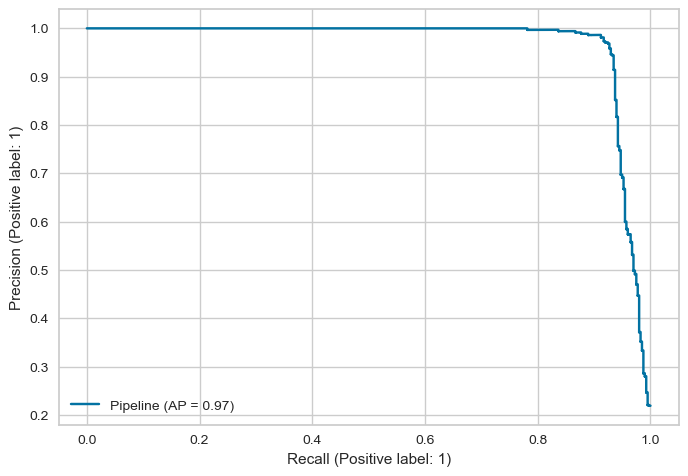

In [91]:
plot_precision_recall_curve(xgb_model, X_test, y_test);

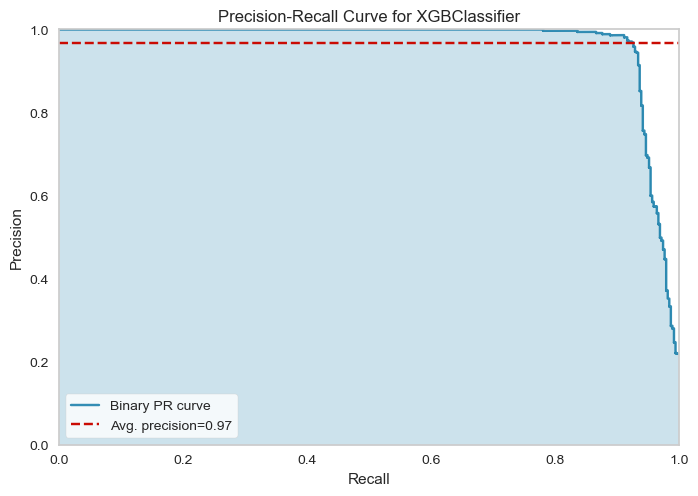

In [92]:
viz = PrecisionRecallCurve(xgb_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Feature Importance

In [93]:
features = ["salary"]+ list(df2.iloc[:,9:].columns) + list(X_train.select_dtypes("number").columns)
pd.DataFrame(index=features, data=xgb_model["XGB"].feature_importances_, columns=['xgb_importance'])

,xgb_importance
salary,0.034
departments_IT,0.000
departments_RandD,0.004
departments_accounting,0.005
departments_hr,0.000
departments_management,0.008
departments_marketing,0.000
departments_product_mng,0.006
departments_sales,0.005
departments_support,0.008


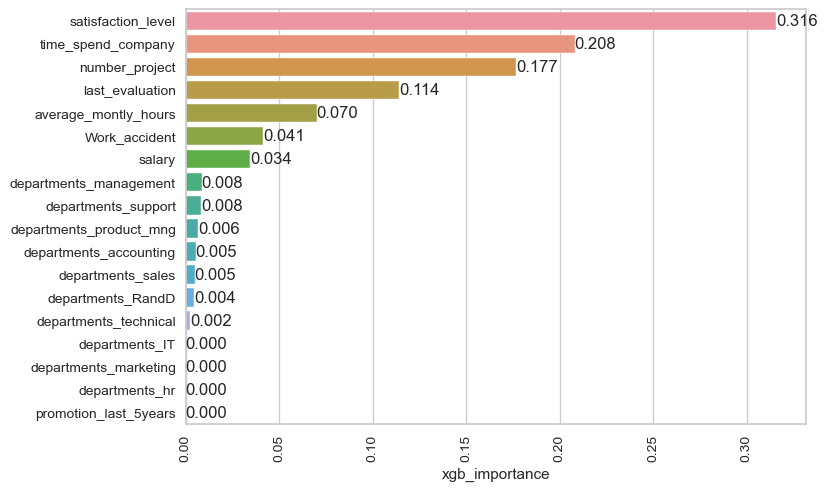

In [94]:
feats = pd.DataFrame(index=features, 
                     data=xgb_model["XGB"].feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)

ax = sns.barplot(data=xgb_imp_feats, y=xgb_imp_feats.index,x='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

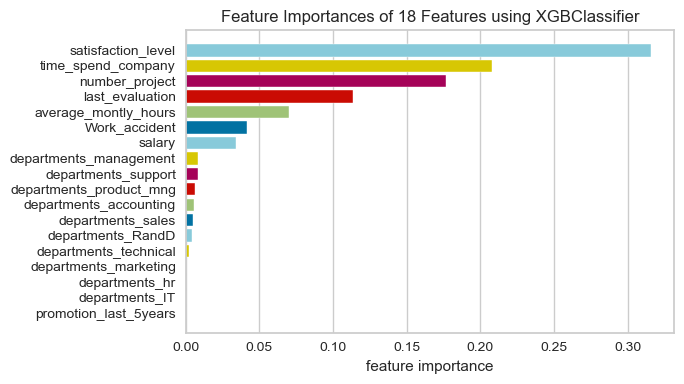

<AxesSubplot:title={'center':'Feature Importances of 18 Features using XGBClassifier'}, xlabel='feature importance'>

In [95]:
viz = FeatureImportances(xgb_model.named_steps['XGB'], relative=False, labels=features)
visualizer = RadViz(size=(700, 400))
viz.fit(X_train, y_train)
viz.show()

#### Scores

In [96]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

### ANN Classifier

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adadelta, Nadam
from tensorflow.keras.callbacks import EarlyStopping

#### Layer Architecture Building and Compiling

In [98]:
print("Before data preprocess; X_train shape is ",X_train.shape)
print("Before data preprocess; X_test shape is ",X_test.shape)

preprocessor = ColumnTransformer(transformers=[
    ('encoder_ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']),
    ('encoder_nominal', OneHotEncoder(), ['departments'])], remainder='passthrough')

data_preprocess = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler())])
X_train_dl = data_preprocess.fit_transform(X_train)
X_test_dl = data_preprocess.transform(X_test)

print("After data preprocess; X_train shape is ",X_train_dl.shape)
print("After data preprocess; X_test shape is ",X_test_dl.shape)

Before data preprocess; X_train shape is  (9592, 9)
Before data preprocess; X_test shape is  (2399, 9)
After data preprocess; X_train shape is  (9592, 18)
After data preprocess; X_test shape is  (2399, 18)


In [99]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995749468683585, 1: 3.01067168863779}

#### Evaluating Model Performance and Tunning

In [100]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_dim = X_train_dl.shape[1]))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10, restore_best_weights = True)

model.fit(x = X_train_dl, y = y_train, validation_split = 0.1, batch_size = 8, epochs = 100, verbose = 1, 
          callbacks = [early_stop], class_weight=class_weights)

print(model.summary())

Epoch 1/100
1079/1079 [==============================] - 6s 4ms/step - loss: 0.3609 - recall: 0.8293 - val_loss: 0.2467 - val_recall: 0.9342
Epoch 2/100
1079/1079 [==============================] - 4s 3ms/step - loss: 0.2357 - recall: 0.9042 - val_loss: 0.2482 - val_recall: 0.9276
Epoch 3/100
1079/1079 [==============================] - 4s 4ms/step - loss: 0.2108 - recall: 0.9105 - val_loss: 0.2608 - val_recall: 0.9276
Epoch 4/100
1079/1079 [==============================] - 4s 4ms/step - loss: 0.2018 - recall: 0.9119 - val_loss: 0.1931 - val_recall: 0.9079
Epoch 5/100
1079/1079 [==============================] - 4s 3ms/step - loss: 0.1936 - recall: 0.9119 - val_loss: 0.2286 - val_recall: 0.9145
Epoch 6/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1889 - recall: 0.9160 - val_loss: 0.1822 - val_recall: 0.9145
Epoch 7/100
1079/1079 [==============================] - 4s 4ms/step - loss: 0.1867 - recall: 0.9167 - val_loss: 0.2008 - val_recall: 0.9145
Epoch 8/100
1

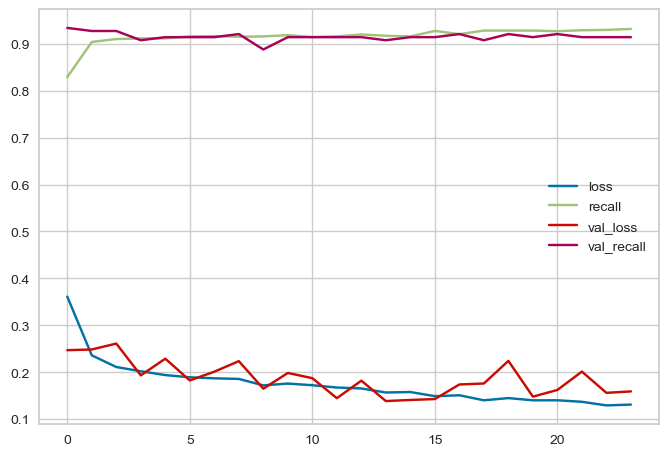

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [102]:
loss, recall = model.evaluate(X_test_dl, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)
print("-----"*20)
y_pred = model.predict(X_test_dl) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss :  0.13688457012176514
recall :  0.9221105575561523
----------------------------------------------------------------------------------------------------
75/75 [==============================] - 0s 2ms/step
[[1948   53]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.92      0.90       398

    accuracy                           0.96      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.96      0.97      2399



In [103]:
model1 = Sequential()
model1.add(Dense(128, activation = "relu", input_dim = X_train_dl.shape[1]))
model1.add(Dense(64, activation = "relu"))
model1.add(Dense(32, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)
model1.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"]) 

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 10, restore_best_weights = True)

model1.fit(x = X_train_dl, y = y_train, validation_split = 0.1, batch_size = 8, epochs = 100, verbose = 1, 
          callbacks = [early_stop])

print(model1.summary())


Epoch 1/100
1079/1079 [==============================] - 4s 3ms/step - loss: 0.2450 - recall: 0.5996 - val_loss: 0.1889 - val_recall: 0.6974
Epoch 2/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1528 - recall: 0.8432 - val_loss: 0.1336 - val_recall: 0.8816
Epoch 3/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1377 - recall: 0.8501 - val_loss: 0.1452 - val_recall: 0.7763
Epoch 4/100
1079/1079 [==============================] - 4s 3ms/step - loss: 0.1266 - recall: 0.8640 - val_loss: 0.1637 - val_recall: 0.8224
Epoch 5/100
1079/1079 [==============================] - 4s 3ms/step - loss: 0.1266 - recall: 0.8647 - val_loss: 0.1268 - val_recall: 0.8816
Epoch 6/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1242 - recall: 0.8661 - val_loss: 0.1285 - val_recall: 0.8421
Epoch 7/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1153 - recall: 0.8813 - val_loss: 0.1193 - val_recall: 0.8684
Epoch 8/100
1

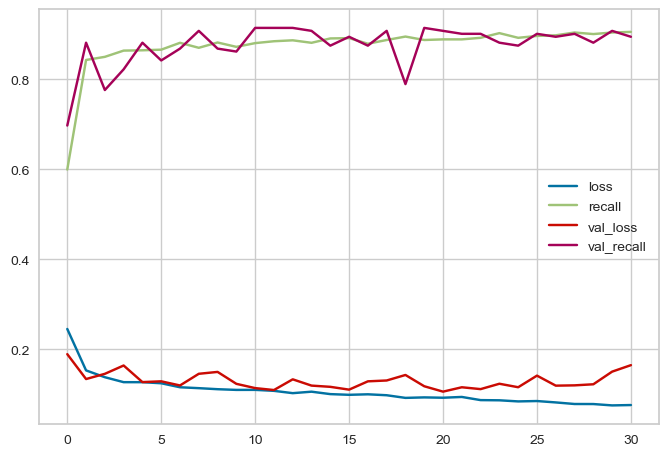

In [104]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.plot()
plt.show()

In [105]:
loss, recall = model1.evaluate(X_test_dl, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)
print("-----"*20)
y_pred = model1.predict(X_test_dl) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss :  0.11100073903799057
recall :  0.9145728349685669
----------------------------------------------------------------------------------------------------
75/75 [==============================] - 0s 2ms/step
[[1970   31]
 [  34  364]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.92      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



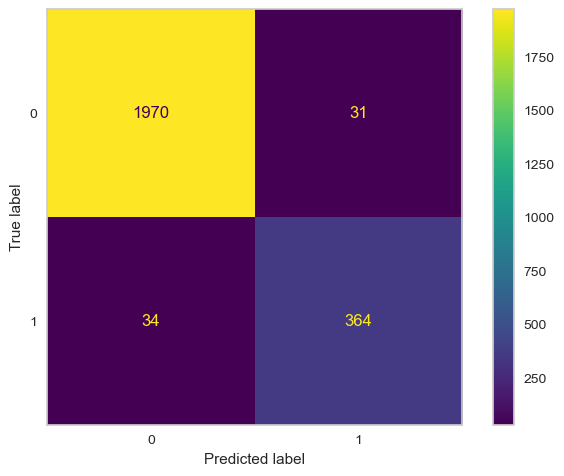

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

75/75 [==============================] - 0s 3ms/step


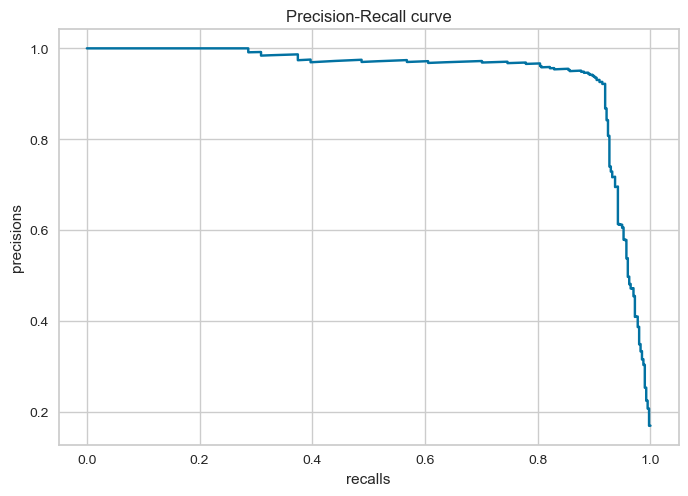

----------------------------------------------------------------------------------------------------
0.9418941408266484


In [107]:
y_pred_proba = model1.predict(X_test_dl)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
print("-----"*20)
print(average_precision_score(y_test, y_pred_proba))

#### Scores

In [108]:
y_pred = model1.predict(X_test_dl) > 0.5
y_pred_proba = model1.predict(X_test_dl)

ann_accuracy = accuracy_score(y_test, y_pred)
ann_precision = precision_score(y_test, y_pred)
ann_recall = recall_score(y_test, y_pred)
ann_f1 = f1_score(y_test, y_pred)
ann_precision_recall = average_precision_score(y_test, y_pred_proba)

75/75 [==============================] - 0s 2ms/step


## 6. Model Comparison

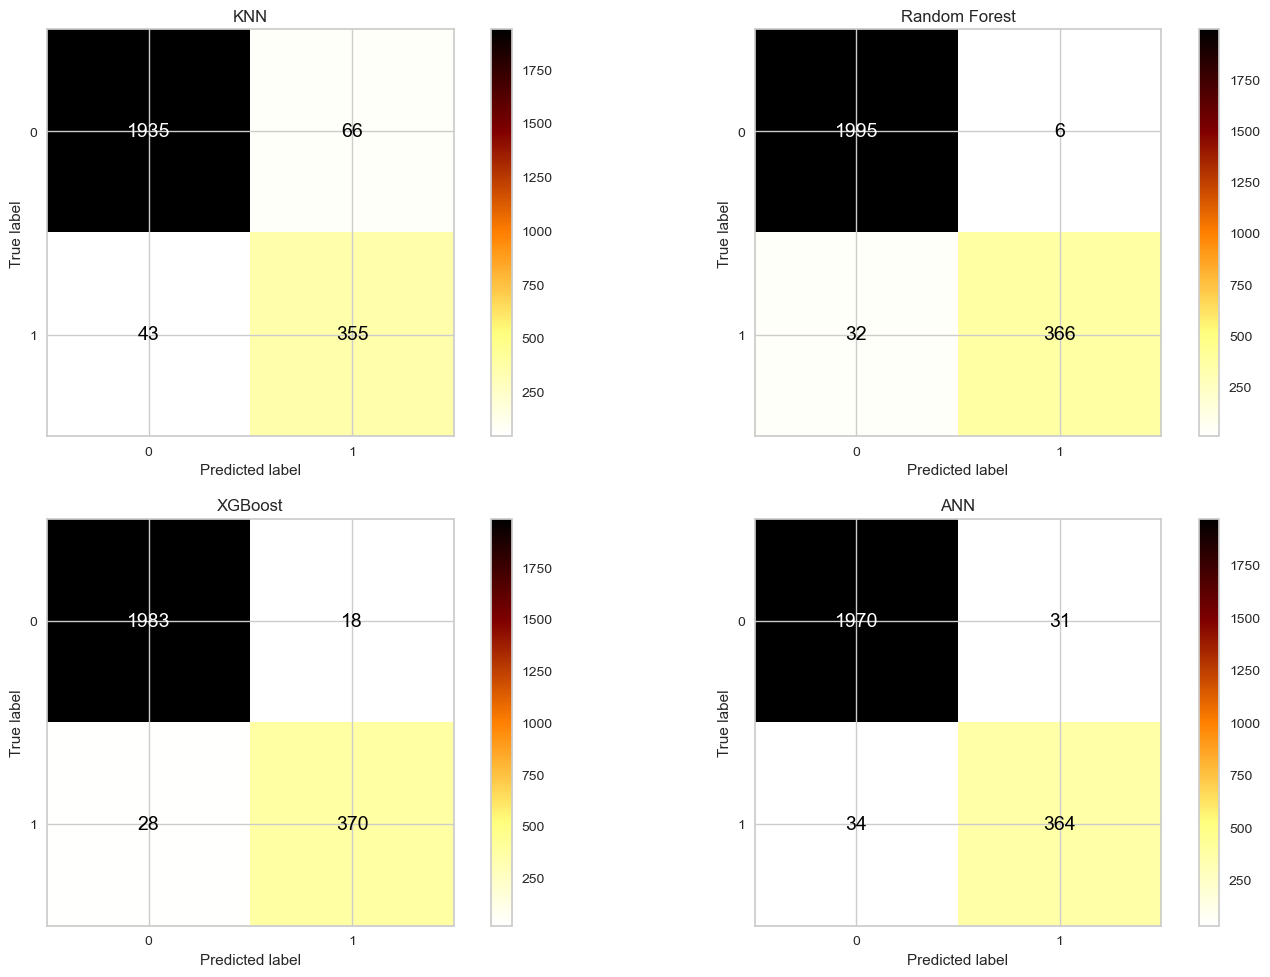

In [109]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
plt.rcParams.update({'font.size': 14})
plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.afmhot_r, ax=axes[0,0])
axes[0,0].title.set_text("KNN")
plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.afmhot_r, ax=axes[0,1])
axes[0,1].title.set_text("Random Forest")
plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.afmhot_r, ax=axes[1,0])
axes[1,0].title.set_text("XGBoost")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[1,1], cmap=plt.cm.afmhot_r)
axes[1,1].title.set_text("ANN")

plt.tight_layout()
plt.show()

In [110]:
compare = pd.DataFrame({
            'Model': ['KNN',  'Random Forest', 'XGBoost', 'ANN'],
            'Accuracy': [knn_accuracy, rf_accuracy, xgb_accuracy, ann_accuracy],
            'Precision': [knn_precision, rf_precision, xgb_precision, ann_precision],
            'Recall': [knn_recall, rf_recall, xgb_recall, ann_recall],
            'F1': [knn_f1, rf_f1, xgb_f1, ann_f1],
            'Precision_Recall': [knn_precision_recall, rf_precision_recall, xgb_precision_recall, ann_precision_recall]
})
compare

,Model,Accuracy,Precision,Recall,F1,Precision_Recall
0,KNN,0.955,0.843,0.892,0.867,0.871
1,Random Forest,0.984,0.984,0.920,0.951,0.962
2,XGBoost,0.981,0.954,0.930,0.941,0.968
3,ANN,0.973,0.922,0.915,0.918,0.942


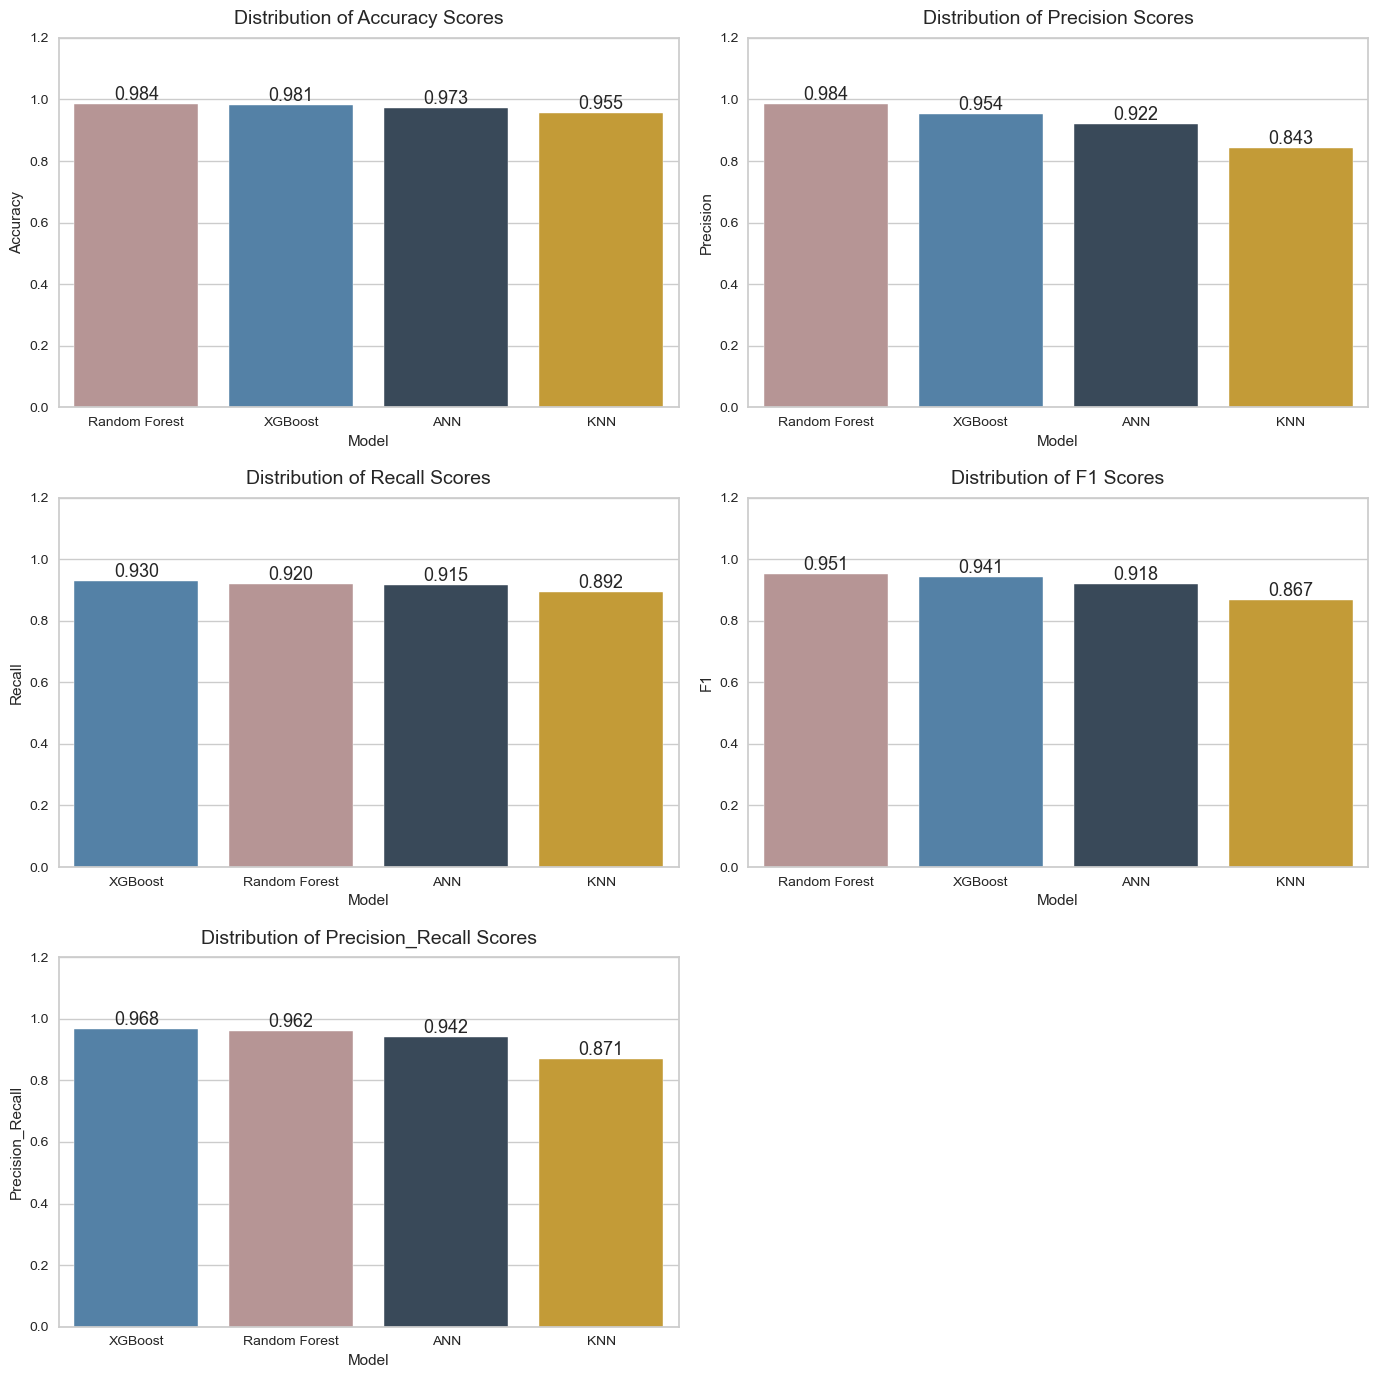

In [111]:
plt.figure(figsize=(14,14))

index = 0
colors={'XGBoost': 'steelblue', 'Random Forest': 'rosybrown', 'KNN': 'goldenrod', 'ANN':'#34495E'}

for col in compare.iloc[:, 1:].columns:    
    index += 1
    plt.subplot(3,2,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x="Model", y=col, palette=colors)
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=13), plt.ylim(0, 1.2)
    plt.title(f'Distribution of {col} Scores', fontsize=14, pad=10)
plt.tight_layout()

## 7. Model Deployement

### Save and Export the Model

In [112]:
operations = [("OrdinalEncoder", preprocessor), ("XGB", XGBClassifier(random_state=42, n_estimators=200))]
xgb_model = Pipeline(steps=operations)
xgb_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder_ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('encoder_nominal',
                                                  OneHotEncoder(),
                                                  ['departments'])])),
                ('XGB', XGBClassifier(n_estimators=200, random_state=42))])

In [113]:
import joblib
joblib.dump(xgb_model, open('xgb_model_final.pkl', 'wb'))

# import pickle
# pickle.dump(xgb_model, open("xgb_model_final2", 'wb'))

### Save and Export Variables


In [114]:
final_model = joblib.load(open('xgb_model_final.pkl', 'rb'))
# final_model2 = pickle.load(open("xgb_model_final2", "rb"))

In [115]:
sample = pd.DataFrame({
        'satisfaction_level': 0.38,
        'last_evaluation': 0.53,
        'number_project': 2,
        'average_montly_hours': 157,
        'time_spend_company': 3,
        'Work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'sales',
        'salary': 'low'
}, index=[0])

sample

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,0,sales,low


In [116]:
final_model.predict(sample)

array([1], dtype=int64)